In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
print(train_images)
print(train_labels)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[5 0 4 ... 5 6 8]


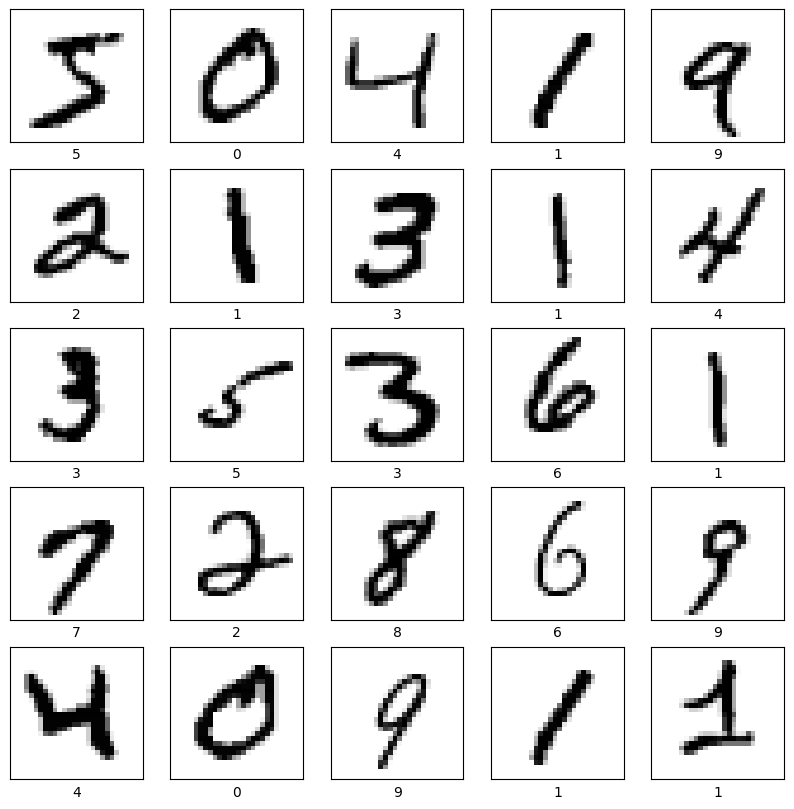

In [4]:

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()


In [5]:
# Preprocessing the data by normalizing the pixel values to the range.

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


In [6]:
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## Part 1.2) 

In [10]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Set the path to the dataset folder
dataset_path = r'C:\Users\Standard User\OneDrive\Documents\IITJ\MTech\Sem3\Deep Learning\Assignments\Assignment1\dataset\caltech-101'

# Function to load images from a specified path
def load_images_from_directory(directory, target_size=(64, 64)):
    images = []
    labels = []
    classes = os.listdir(directory)
    for idx, class_name in enumerate(classes):
        class_folder = os.path.join(directory, class_name)
        if os.path.isdir(class_folder):
            for image_filename in os.listdir(class_folder):
                image_path = os.path.join(class_folder, image_filename)
                image = cv2.imread(image_path)
                if image is not None:
                    image = cv2.resize(image, target_size)  # Resize for consistency
                    images.append(image)
                    labels.append(idx)  # Use index as label
    return images, labels, classes

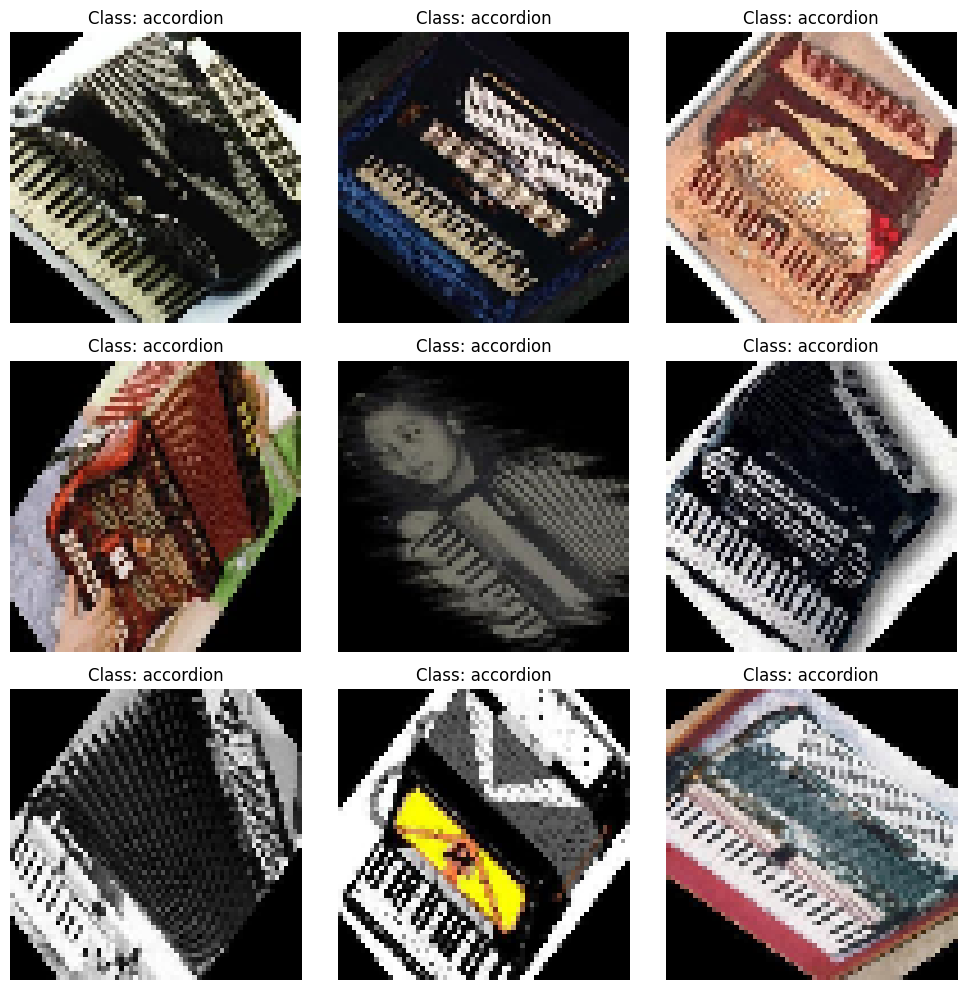

Shape of images array: (9145, 64, 64, 3)
Data type of images array: float32


In [11]:

# Load a subset of images for visualization
images, labels, classes = load_images_from_directory(dataset_path, (64, 64))

# Function to plot images in a grid
def plot_sample_images(images, labels, num_rows, num_cols):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    axes = axes.flatten()
    for img, lbl, ax in zip(images[:num_rows*num_cols], labels[:num_rows*num_cols], axes):
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        ax.set_title(f"Class: {classes[lbl]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize some of the images
plot_sample_images(images, labels, 3, 3)

# Convert images to numpy array and normalize
images_array = np.array(images, dtype='float32') / 255.0

# Check shape and data type
print("Shape of images array:", images_array.shape)
print("Data type of images array:", images_array.dtype)

Processing and normalizing the dataset

In [16]:
pip install torchvision


   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------ --------------------------------- 0.2/1.3 MB 4.6 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.3 MB 4.1 MB/s eta 0:00:01
   -------------------- ------------------- 0.6/1.3 MB 4.5 MB/s eta 0:00:01
   -------------------------- ------------- 0.9/1.3 MB 4.5 MB/s eta 0:00:01
   ---------------------------------- ----- 1.1/1.3 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/199.4 MB ? eta -:--:--
   ---------------------------------------- 0.2/199.4 MB 7.6 MB/s eta 0:00:27
   ---------------------------------------- 0.5/199.4 MB 6.2 MB/s eta 0:00:33
   ---------------------------------------- 0.7/199.4 MB 5.3 MB/s eta 0:00:38
   ---------------------------------------- 1.0/199.4 MB 5.4 MB/s eta 0:00:37
   ------------


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from torchvision import datasets, transforms

# Define transformations for the dataset
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to a standard size
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Load dataset
dataset_path = r'C:\Users\Standard User\OneDrive\Documents\IITJ\MTech\Sem3\Deep Learning\Assignments\Assignment1\dataset\caltech-101' 
caltech_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

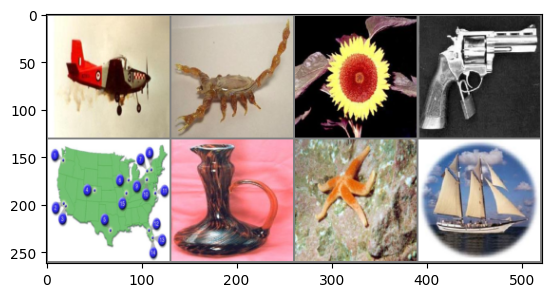

In [8]:
import torch
import torchvision

def imshow(img):
    # Unnormalize the image for visualization
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

loaddata = torch.utils.data.DataLoader(caltech_dataset, batch_size=8, shuffle=True)

# Get a batch of 8 images to display them in 2 rows and 4 columns
dataitems = iter(loaddata)
images, labels = next(dataitems)

# Configure the number of images to display in the grid
grid_images = torchvision.utils.make_grid(images, nrow=4)  # Set number of rows in the grid

# Show images using the modified imshow function
imshow(grid_images)


## Part 2. CNN Architecture

### 1) Basic CNN Model

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Input(shape=input_shape),  # Explicitly defining the input layer
        layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Define the input shape and number of classes
model = create_cnn_model(input_shape=(128, 128, 3), num_classes=10)
model.summary()  # This will print the details of your model architecture


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       8,388,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,409,418 (32.08 MB)

 Trainable params: 8,409,418 (32.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Train CNN model  on MNIST

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the CNN model with regularization
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), 
                      kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization added
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Flatten(),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.5),  # Dropout to reduce overfitting
        layers.Dense(10, activation='softmax')
    ])
    return model

# EarlyStopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define the model and train it with categorical cross-entropy and Adam optimizer
model = create_model()
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=5)])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1, callbacks=[early_stopping])


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.7673 - loss: 0.8808 - top_k_categorical_accuracy: 0.9516 - val_accuracy: 0.9810 - val_loss: 0.2092 - val_top_k_categorical_accuracy: 0.9992
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9616 - loss: 0.2790 - top_k_categorical_accuracy: 0.9989 - val_accuracy: 0.9862 - val_loss: 0.1673 - val_top_k_categorical_accuracy: 0.9988
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9703 - loss: 0.2231 - top_k_categorical_accuracy: 0.9990 - val_accuracy: 0.9840 - val_loss: 0.1609 - val_top_k_categorical_accuracy: 0.9992
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9733 - loss: 0.2007 - top_k_categorical_accuracy: 0.9991 - val_accuracy: 0.9877 - val_loss: 0.1405 - val_top_k_categorical_accuracy: 0.9995
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9768 - loss: 0.1818 - top_k_categorical_accuracy: 0.9991 - val_accuracy: 0.9898 - val_loss: 0.1320 - val_

In [ ]:
Evaluate model

In [4]:
# Test and evaluate the model
test_loss, test_acc, test_top5_acc = model.evaluate(x_test, y_test)

# Print the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test Top 1 Accuracy: {test_acc}")
print(f"Test Top 5 Accuracy: {test_top5_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9848 - loss: 0.1421 - top_k_categorical_accuracy: 1.0000
Test Loss: 0.13162027299404144
Test Top 1 Accuracy: 0.9886000156402588
Test Top 5 Accuracy: 1.0


In [ ]:
Train CNN on Caltech-101 dataset

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.utils import to_categorical

dataset_path = r"C:\Users\Standard User\OneDrive\Documents\IITJ\MTech\Sem3\Deep Learning\Assignments\Assignment1\dataset\caltech-101"

train_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.1,  # Split the dataset into training and validation sets
    subset="training",
    seed=123,
    image_size=(128, 128),  # Resize the images to 128x128
    batch_size=64
)

val_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size=64
)

# Normalize the pixel values to [0, 1]
normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# Convert labels to one-hot encoding (to match categorical crossentropy)
train_dataset = train_dataset.map(lambda x, y: (x, tf.one_hot(y, depth=102)))
val_dataset = val_dataset.map(lambda x, y: (x, tf.one_hot(y, depth=102)))

# Define the CNN model with regularization
def create_model(input_shape=(128, 128, 3), num_classes=102): 
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, 
                      kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization added
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.5),  # Dropout to reduce overfitting
        layers.Dense(num_classes, activation='softmax')  # Update for 102 classes
    ])
    return model

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Create the model
model = create_model()

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',  # Use categorical_crossentropy for one-hot encoded labels
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=5)])

# Train the model
model.fit(train_dataset, epochs=8, validation_data=val_dataset, callbacks=[early_stopping])


Found 9144 files belonging to 102 classes.
Using 8230 files for training.
Found 9144 files belonging to 102 classes.
Using 914 files for validation.
Epoch 1/8
129/129 ━━━━━━━━━━━━━━━━━━━━ 84s 602ms/step - accuracy: 0.1520 - loss: 4.4117 - top_k_categorical_accuracy: 0.2712 - val_accuracy: 0.3096 - val_loss: 3.4400 - val_top_k_categorical_accuracy: 0.4562
Epoch 2/8
129/129 ━━━━━━━━━━━━━━━━━━━━ 79s 605ms/step - accuracy: 0.3007 - loss: 3.4902 - top_k_categorical_accuracy: 0.4272 - val_accuracy: 0.3961 - val_loss: 3.1633 - val_top_k_categorical_accuracy: 0.5230
Epoch 3/8
129/129 ━━━━━━━━━━━━━━━━━━━━ 77s 590ms/step - accuracy: 0.3662 - loss: 3.1887 - top_k_categorical_accuracy: 0.5088 - val_accuracy: 0.4322 - val_loss: 2.9577 - val_top_k_categorical_accuracy: 0.5908
Epoch 4/8
129/129 ━━━━━━━━━━━━━━━━━━━━ 78s 597ms/step - accuracy: 0.3974 - loss: 3.0023 - top_k_categorical_accuracy: 0.5627 - val_accuracy: 0.4497 - val_loss: 2.7524 - val_top_k_categorical_accuracy: 0.6258
Epoch 5/8
129/129 ━

In [12]:
# Evaluate the model on the validation dataset
test_loss, test_acc, test_top5_acc = model.evaluate(val_dataset)

# Print the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test Top 1 Accuracy: {test_acc}")
print(f"Test Top 5 Accuracy: {test_top5_acc}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - accuracy: 0.5190 - loss: 2.5491 - top_k_categorical_accuracy: 0.7091
Test Loss: 2.5548977851867676
Test Top 1 Accuracy: 0.5153172612190247
Test Top 5 Accuracy: 0.7002187967300415


In [ ]:
Exploring change in accuracy with different loss functions and optimizers

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the CNN model
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# List of loss functions and optimizers to experiment with
loss_functions = ['categorical_crossentropy', 'sparse_categorical_crossentropy']
optimizers = ['adam', 'sgd', 'rmsprop']

# Function to train and evaluate the model
def train_evaluate(model, loss_function, optimizer):
    model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=2)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Loss: {test_loss}, Accuracy: {test_acc}")

# Train the model with different combinations
for loss in loss_functions:
    for opt in optimizers:
        print(f"\nTraining with Loss: {loss}, Optimizer: {opt}")
        model = create_model()
        train_evaluate(model, loss, opt)



Training with Loss: categorical_crossentropy, Optimizer: adam
Epoch 1/5
844/844 - 31s - 37ms/step - accuracy: 0.9409 - loss: 0.1971 - val_accuracy: 0.9822 - val_loss: 0.0637
Epoch 2/5
844/844 - 37s - 44ms/step - accuracy: 0.9826 - loss: 0.0555 - val_accuracy: 0.9848 - val_loss: 0.0523
Epoch 3/5
844/844 - 39s - 47ms/step - accuracy: 0.9882 - loss: 0.0392 - val_accuracy: 0.9905 - val_loss: 0.0366
Epoch 4/5
844/844 - 20s - 24ms/step - accuracy: 0.9910 - loss: 0.0299 - val_accuracy: 0.9885 - val_loss: 0.0386
Epoch 5/5
844/844 - 20s - 23ms/step - accuracy: 0.9924 - loss: 0.0238 - val_accuracy: 0.9898 - val_loss: 0.0414
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9844 - loss: 0.0494
Loss: 0.03811188042163849, Accuracy: 0.9879000186920166

Training with Loss: categorical_crossentropy, Optimizer: sgd
Epoch 1/5
844/844 - 23s - 27ms/step - accuracy: 0.7097 - loss: 1.0004 - val_accuracy: 0.9273 - val_loss: 0.2430
Epoch 2/5
844/844 - 21s - 24ms/step - accuracy: 0.9268 - loss: 0.2376 - 

ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None, 10), output.shape=(None, 10)

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Dataset path
dataset_path = "C:/Users/Standard User/OneDrive/Documents/IITJ/MTech/Sem3/Deep Learning/Assignments/Assignment1/dataset/caltech-101"

train_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(128, 128),  # Resize images to 128x128
    batch_size=32
)

val_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

# Normalize the pixel values to [0, 1]
normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# Define a CNN model for the custom dataset
def create_model_custom():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(102, activation='softmax') 
    ])
    return model

# Callback for early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Function to train and evaluate the model on the custom dataset
def train_evaluate_custom(model, loss_function, optimizer):
    model.compile(optimizer=optimizer, 
                  loss=loss_function, 
                  metrics=['accuracy', tf.keras.metrics.SparseTopKCategoricalAccuracy(k=5)])
    
    model.fit(train_dataset, epochs=5, validation_data=val_dataset, callbacks=[early_stopping], verbose=2)
    
    # Evaluate the model on validation dataset
    val_loss, val_acc, val_top5_acc = model.evaluate(val_dataset)
    print(f"Validation Loss: {val_loss}")
    print(f"Validation Top 1 Accuracy: {val_acc}")
    print(f"Validation Top 5 Accuracy: {val_top5_acc}")

# Loss functions and optimizers to experiment with
loss_functions = ['sparse_categorical_crossentropy']  # Use sparse for integer labels
optimizers = ['adam', 'sgd', 'rmsprop']

# Train and evaluate the model on the custom dataset with different loss functions and optimizers
for loss in loss_functions:
    for opt in optimizers:
        print(f"\nEvaluating with Loss: {loss}, Optimizer: {opt} on Custom dataset")
        model = create_model_custom()
        train_evaluate_custom(model, loss, opt)


Found 9144 files belonging to 102 classes.
Using 8230 files for training.
Found 9144 files belonging to 102 classes.
Using 914 files for validation.

Evaluating with Loss: sparse_categorical_crossentropy, Optimizer: adam on Custom dataset
Epoch 1/5
258/258 - 104s - 405ms/step - accuracy: 0.3215 - loss: 3.2920 - sparse_top_k_categorical_accuracy: 0.4601 - val_accuracy: 0.4409 - val_loss: 2.6355 - val_sparse_top_k_categorical_accuracy: 0.5810
Epoch 2/5
258/258 - 51s - 197ms/step - accuracy: 0.5185 - loss: 2.0801 - sparse_top_k_categorical_accuracy: 0.7007 - val_accuracy: 0.5470 - val_loss: 2.0753 - val_sparse_top_k_categorical_accuracy: 0.7046
Epoch 3/5
258/258 - 66s - 255ms/step - accuracy: 0.6764 - loss: 1.2958 - sparse_top_k_categorical_accuracy: 0.8505 - val_accuracy: 0.5766 - val_loss: 2.0933 - val_sparse_top_k_categorical_accuracy: 0.7560
Epoch 4/5
258/258 - 71s - 275ms/step - accuracy: 0.8112 - loss: 0.7147 - sparse_top_k_categorical_accuracy: 0.9352 - val_accuracy: 0.5656 - val_l

## Part 3

### 1

Epoch 1/5


C:\Users\Standard User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


844/844 - 12s - 14ms/step - accuracy: 0.9384 - loss: 0.2037 - val_accuracy: 0.9787 - val_loss: 0.0732
Epoch 2/5
844/844 - 11s - 13ms/step - accuracy: 0.9815 - loss: 0.0575 - val_accuracy: 0.9842 - val_loss: 0.0497
Epoch 3/5
844/844 - 12s - 14ms/step - accuracy: 0.9875 - loss: 0.0407 - val_accuracy: 0.9897 - val_loss: 0.0365
Epoch 4/5
844/844 - 12s - 14ms/step - accuracy: 0.9901 - loss: 0.0304 - val_accuracy: 0.9887 - val_loss: 0.0367
Epoch 5/5
844/844 - 10s - 12ms/step - accuracy: 0.9924 - loss: 0.0238 - val_accuracy: 0.9908 - val_loss: 0.0334
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9868 - loss: 0.0408

Test accuracy using Max Pooling: 0.9897
Epoch 1/5
844/844 - 12s - 14ms/step - accuracy: 0.9331 - loss: 0.2251 - val_accuracy: 0.9785 - val_loss: 0.0797
Epoch 2/5
844/844 - 8s - 10ms/step - accuracy: 0.9790 - loss: 0.0677 - val_accuracy: 0.9872 - val_loss: 0.0458
Epoch 3/5
844/844 - 8s - 9ms/step - accuracy: 0.9851 - loss: 0.0494 - val_accuracy: 0.9888 - val_loss: 0.0384
E

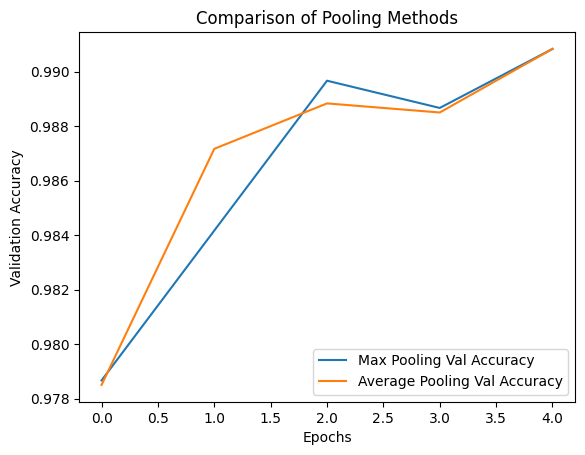

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define CNN model with a customizable pooling layer
def create_model(pooling_type):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),  # First pooling is always Max Pooling
        layers.Conv2D(64, (3, 3), activation='relu'),
        pooling_type,  # This is where the pooling strategy varies
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Training and evaluation function
def train_and_evaluate(pooling_type_name, pooling_layer, epochs=5):
    model = create_model(pooling_layer)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_split=0.1, verbose=2)
    
    test_loss, test_acc = model.evaluate(x_test, y_test)
    
    print(f"\nTest accuracy using {pooling_type_name}: {test_acc:.4f}")
    
    return history

# Train and evaluate with Max Pooling
max_pooling_history = train_and_evaluate('Max Pooling', layers.MaxPooling2D((2, 2)))

# Train and evaluate with Average Pooling
avg_pooling_history = train_and_evaluate('Average Pooling', layers.AveragePooling2D((2, 2)))

# Plot accuracy curves for comparison
def plot_accuracy(history1, history2, label1, label2):
    plt.plot(history1.history['val_accuracy'], label=label1 + ' Val Accuracy')
    plt.plot(history2.history['val_accuracy'], label=label2 + ' Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.title('Comparison of Pooling Methods')
    plt.legend()
    plt.show()

plot_accuracy(max_pooling_history, avg_pooling_history, 'Max Pooling', 'Average Pooling')


Found 9144 files belonging to 102 classes.
Using 8230 files for training.
Found 9144 files belonging to 102 classes.
Using 914 files for validation.
Epoch 1/3
258/258 - 38s - 145ms/step - accuracy: 0.2620 - loss: 3.6149 - val_accuracy: 0.3851 - val_loss: 3.0849
Epoch 2/3
258/258 - 38s - 148ms/step - accuracy: 0.4266 - loss: 2.6300 - val_accuracy: 0.4453 - val_loss: 2.6458
Epoch 3/3
258/258 - 40s - 156ms/step - accuracy: 0.5179 - loss: 2.0307 - val_accuracy: 0.4584 - val_loss: 2.4765
Epoch 1/3
258/258 - 48s - 185ms/step - accuracy: 0.2256 - loss: 3.7578 - val_accuracy: 0.3282 - val_loss: 3.2574
Epoch 2/3
258/258 - 43s - 165ms/step - accuracy: 0.3661 - loss: 2.9271 - val_accuracy: 0.3862 - val_loss: 2.7590
Epoch 3/3
258/258 - 46s - 178ms/step - accuracy: 0.4640 - loss: 2.3193 - val_accuracy: 0.4486 - val_loss: 2.4537


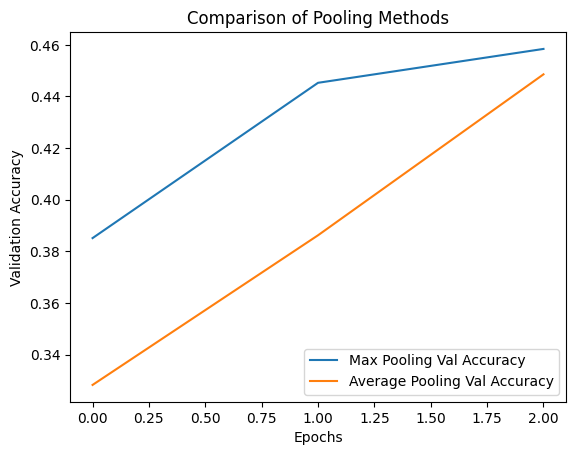

In [18]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Load and preprocess custom dataset (Caltech-101)
dataset_path = "C:/Users/Standard User/OneDrive/Documents/IITJ/MTech/Sem3/Deep Learning/Assignments/Assignment1/dataset/caltech-101"

# Set parameters for dataset loading
batch_size = 32
img_size = (128, 128)

train_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Normalize pixel values to [0, 1]
normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# Update model for custom dataset (3 output classes here, adjust accordingly)
def create_custom_model(pooling_type):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        pooling_type,
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(102, activation='softmax')  # Adjust the number of classes for custom dataset
    ])
    return model

# Train and evaluate on custom dataset
def train_and_evaluate_custom(pooling_type_name, pooling_layer, epochs=5):
    model = create_custom_model(pooling_layer)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(train_dataset, epochs=epochs, validation_data=val_dataset, verbose=2)
    
    return history

# Train and evaluate with Max Pooling
max_pooling_custom_history = train_and_evaluate_custom('Max Pooling', layers.MaxPooling2D((2, 2)), epochs=3)

# Train and evaluate with Average Pooling
avg_pooling_custom_history = train_and_evaluate_custom('Average Pooling', layers.AveragePooling2D((2, 2)), epochs=3)

# Plot accuracy curves for custom dataset
plot_accuracy(max_pooling_custom_history, avg_pooling_custom_history, 'Max Pooling', 'Average Pooling')


## Part 4

## 1.

Visualize Feature Maps for the MNIST Dataset

Train and Initialize model

In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the CNN model with an explicit Input layer
def create_model():
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),  # Explicit Input layer
        layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Flatten(),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Create and compile the model
model = create_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=5)])

# Train the model
model.fit(x_train, y_train, epochs=1, batch_size=64, validation_split=0.1)


844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.7834 - loss: 0.8277 - top_k_categorical_accuracy: 0.9607 - val_accuracy: 0.9795 - val_loss: 0.2093 - val_top_k_categorical_accuracy: 0.9990


Visualizing Feature Maps

In [36]:
# Print all layer names
for layer in model.layers:
    print(layer.name)


conv2d_59
max_pooling2d_45
conv2d_60
max_pooling2d_46
conv2d_61
flatten_21
dense_42
dropout_8
dense_43


In [37]:
for idx, layer in enumerate(model.layers):
    print(f"Layer {idx}: {layer.name}")

Layer 0: conv2d_59
Layer 1: max_pooling2d_45
Layer 2: conv2d_60
Layer 3: max_pooling2d_46
Layer 4: conv2d_61
Layer 5: flatten_21
Layer 6: dense_42
Layer 7: dropout_8
Layer 8: dense_43


Train and Initialize model , 2nd attempt

In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [48]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to [0, 1] and reshape
x_train = x_train.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)  

x_test = x_test.astype('float32') / 255.0
x_test = np.expand_dims(x_test, axis=-1)    


In [49]:
def create_new_cnn_model():
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, (3, 3), activation='relu', name='conv_layer1'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', name='conv_layer2'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Create the model
model = create_new_cnn_model()


In [50]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8712 - loss: 0.4242 - val_accuracy: 0.9807 - val_loss: 0.0653
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9817 - loss: 0.0620 - val_accuracy: 0.9865 - val_loss: 0.0452
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9883 - loss: 0.0381 - val_accuracy: 0.9898 - val_loss: 0.0343
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9913 - loss: 0.0264 - val_accuracy: 0.9868 - val_loss: 0.0459
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9925 - loss: 0.0221 - val_accuracy: 0.9903 - val_loss: 0.0339


In [51]:
sample_input = np.zeros((1, 28, 28, 1))
model.predict(sample_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


array([[0.10389777, 0.11756794, 0.10515981, 0.08938196, 0.09088624,
        0.10310877, 0.09320331, 0.10772701, 0.09980435, 0.08926283]],
      dtype=float32)

In [53]:
activation_model = models.Model(inputs=model.layers[0].input, outputs=layer_outputs)


In [54]:
def visualize_feature_maps(image, label):
    # Expand dimensions to match the model's input shape
    img_tensor = np.expand_dims(image, axis=0)
    
    # Get the feature maps
    activations = activation_model.predict(img_tensor)
    
    layer_names = ['conv_layer1', 'conv_layer2']
    
    for layer_name, activation in zip(layer_names, activations):
        num_filters = activation.shape[-1]
        size = activation.shape[1]
        
        # Set up a grid for displaying the feature maps
        cols = 8  # Number of columns in the grid
        rows = num_filters // cols + (num_filters % cols > 0)
        plt.figure(figsize=(15, rows * 1.5))
        plt.suptitle(f'Feature maps of layer: {layer_name} for digit {label}', fontsize=16)
        
        for i in range(num_filters):
            plt.subplot(rows, cols, i + 1)
            plt.imshow(activation[0, :, :, i], cmap='viridis')
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()


Selecting One Image from Each Class

In [55]:
# Initialize a list to hold one image per class
images_per_class = []

# Iterate over classes 0-9
for digit in range(10):
    # Find the indices of images belonging to the current digit
    indices = np.where(y_test == digit)[0]
    # Select the first image of the current digit
    img = x_test[indices[0]]
    images_per_class.append((img, digit))


Visualizing feature maps for each digit

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


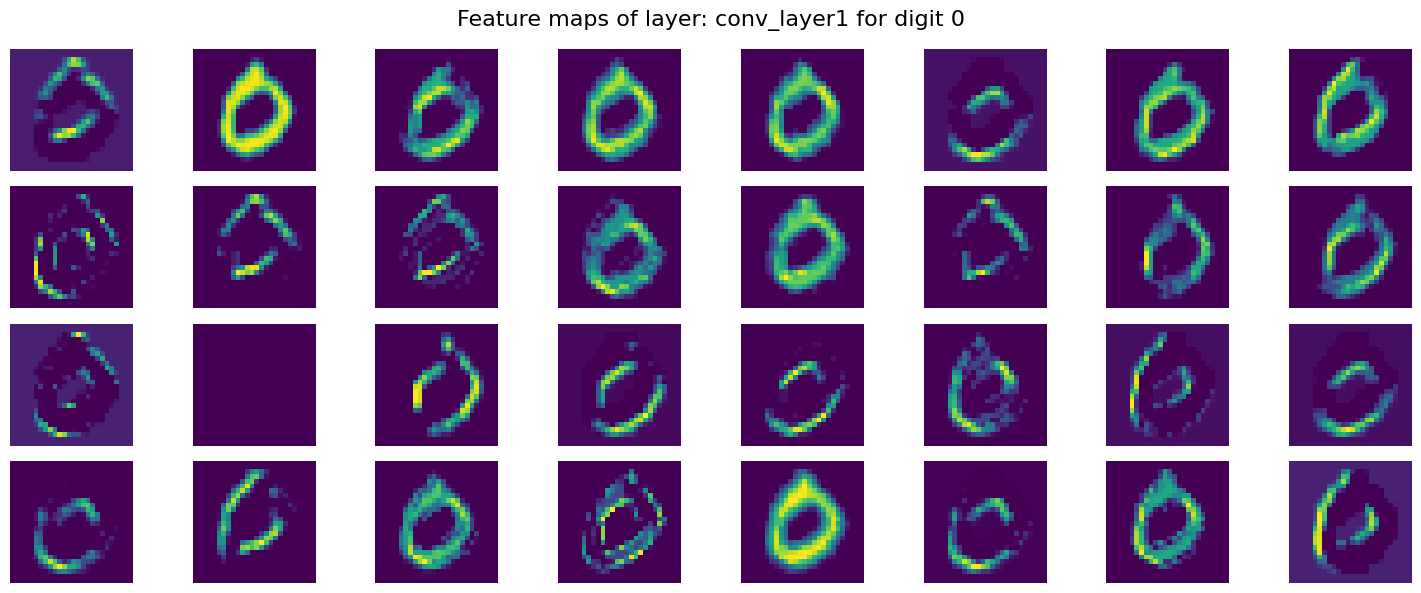

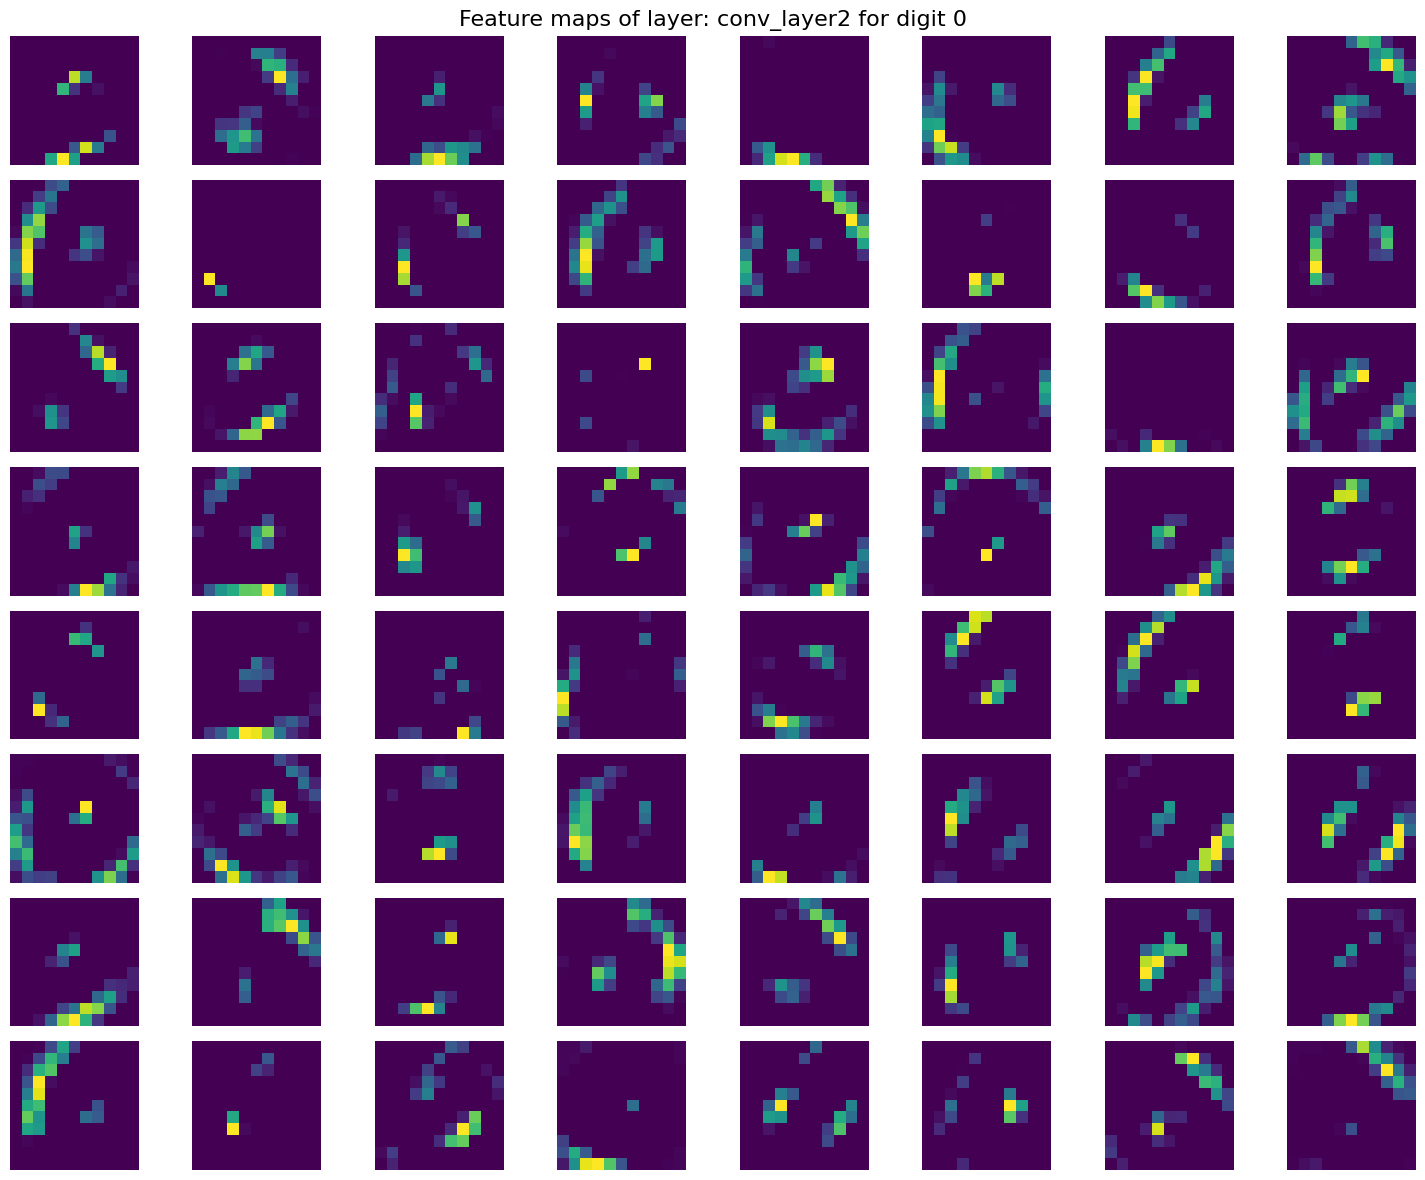

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


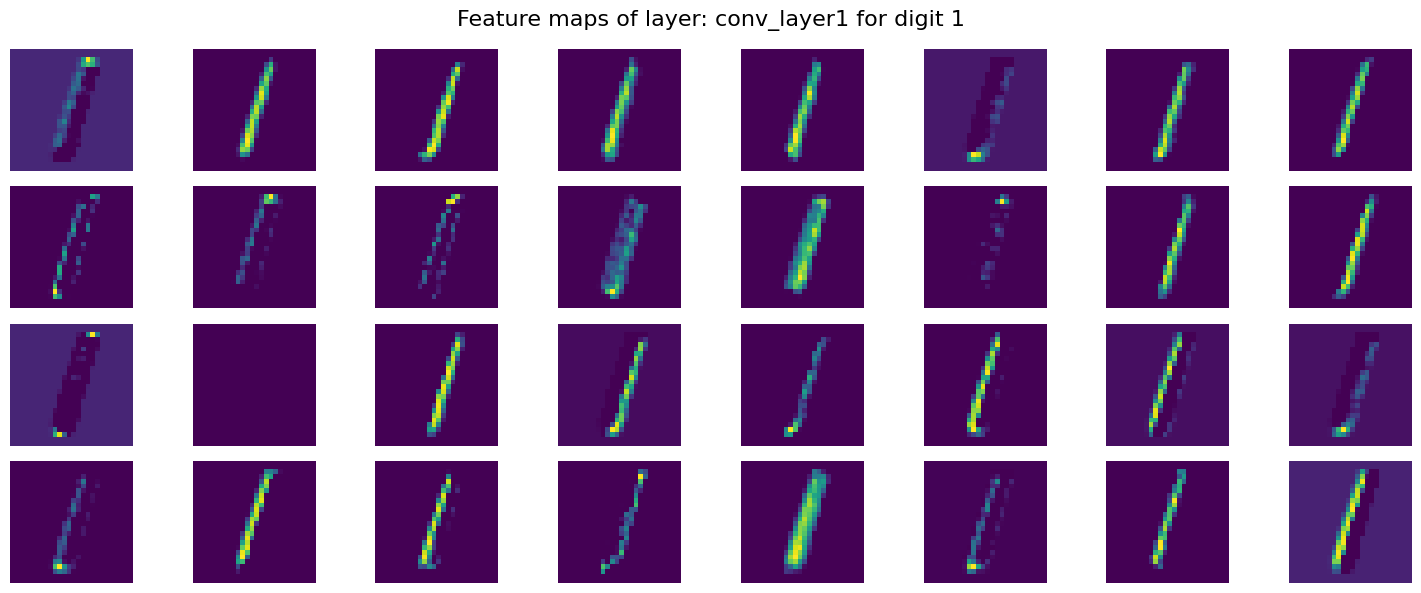

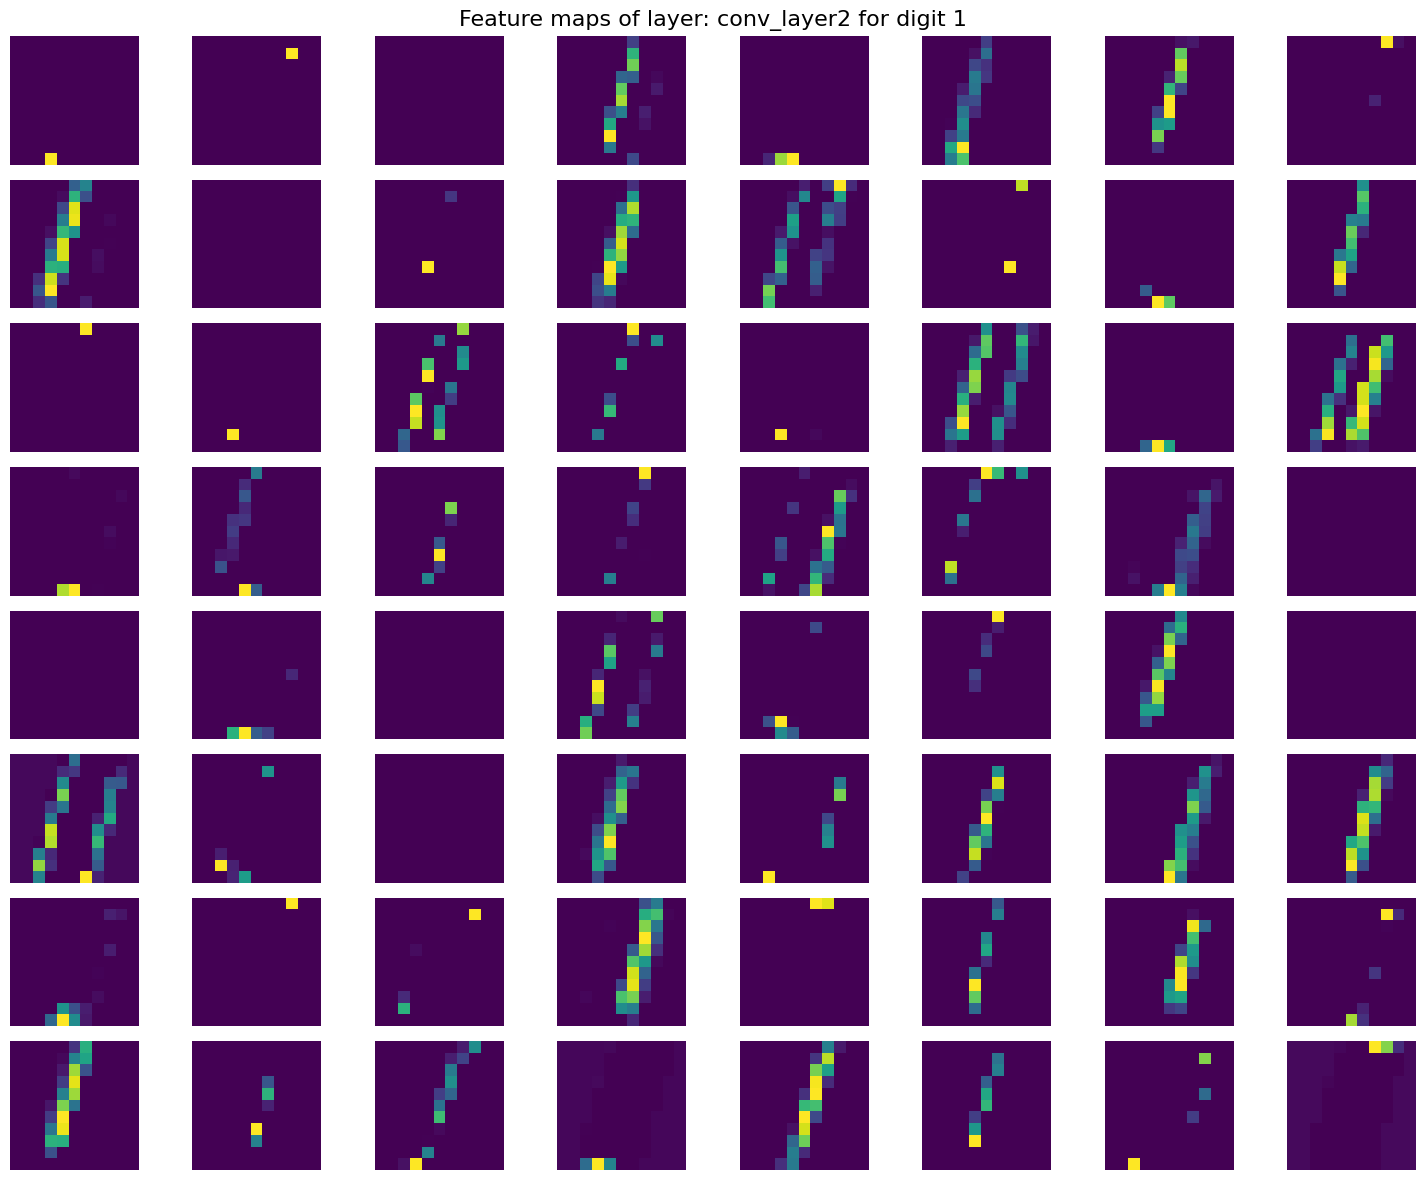

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


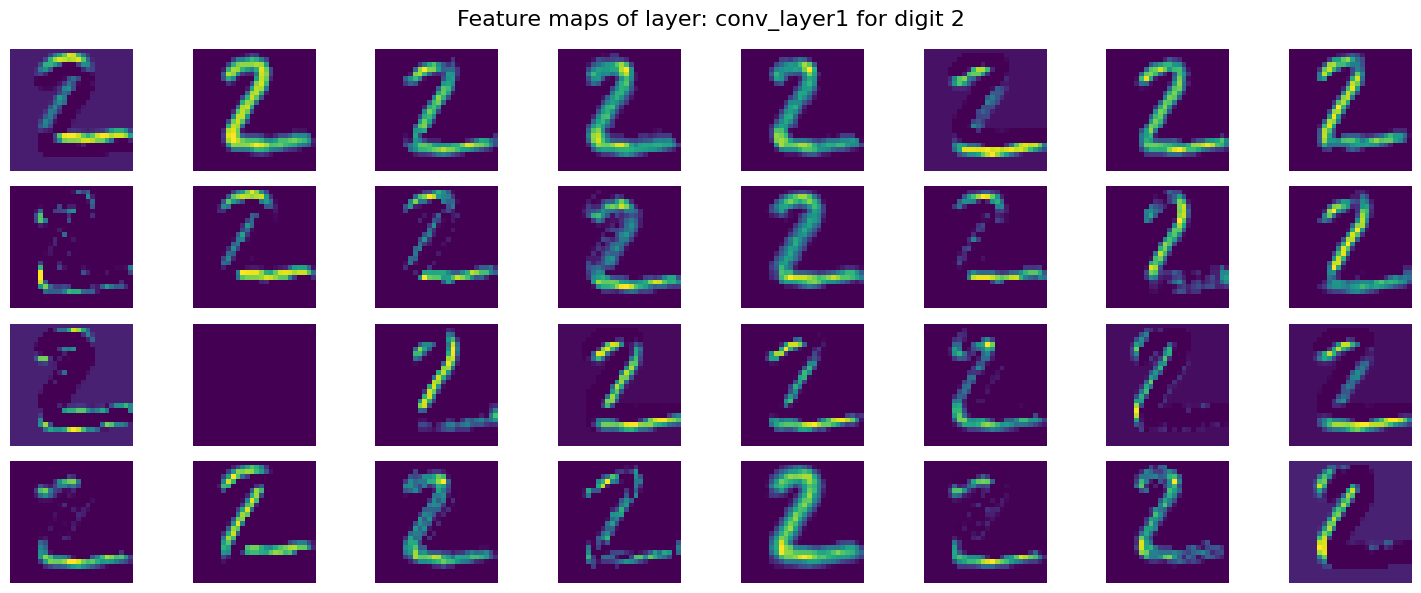

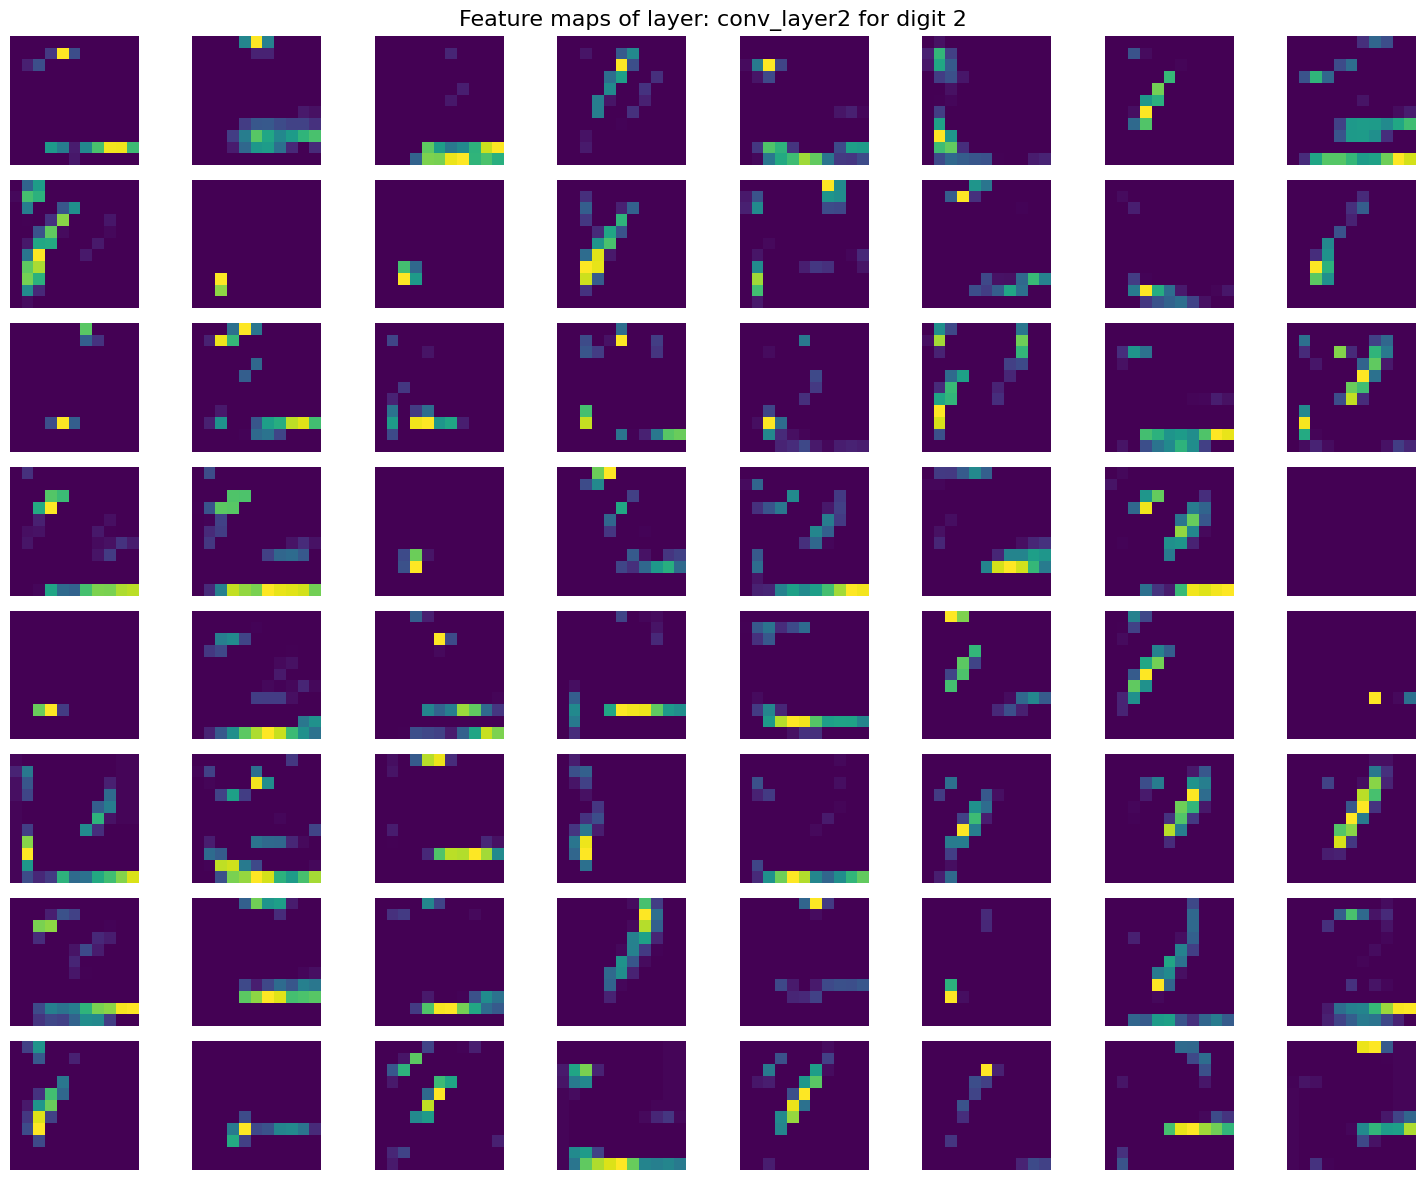

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


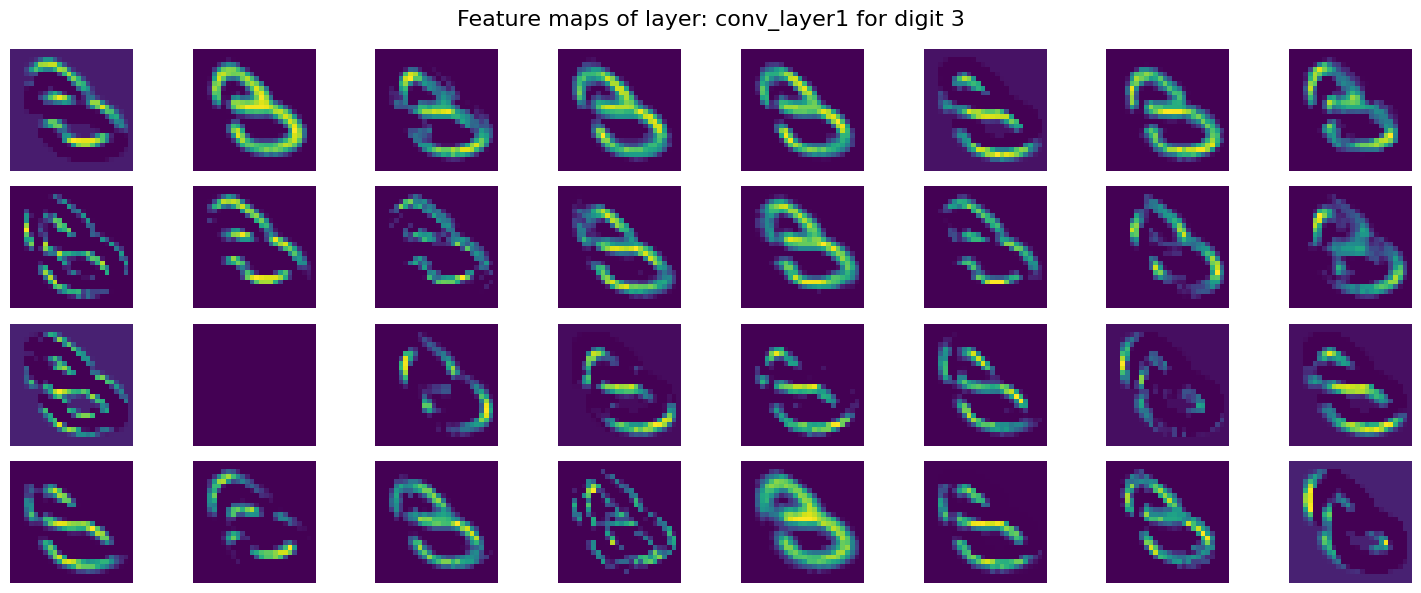

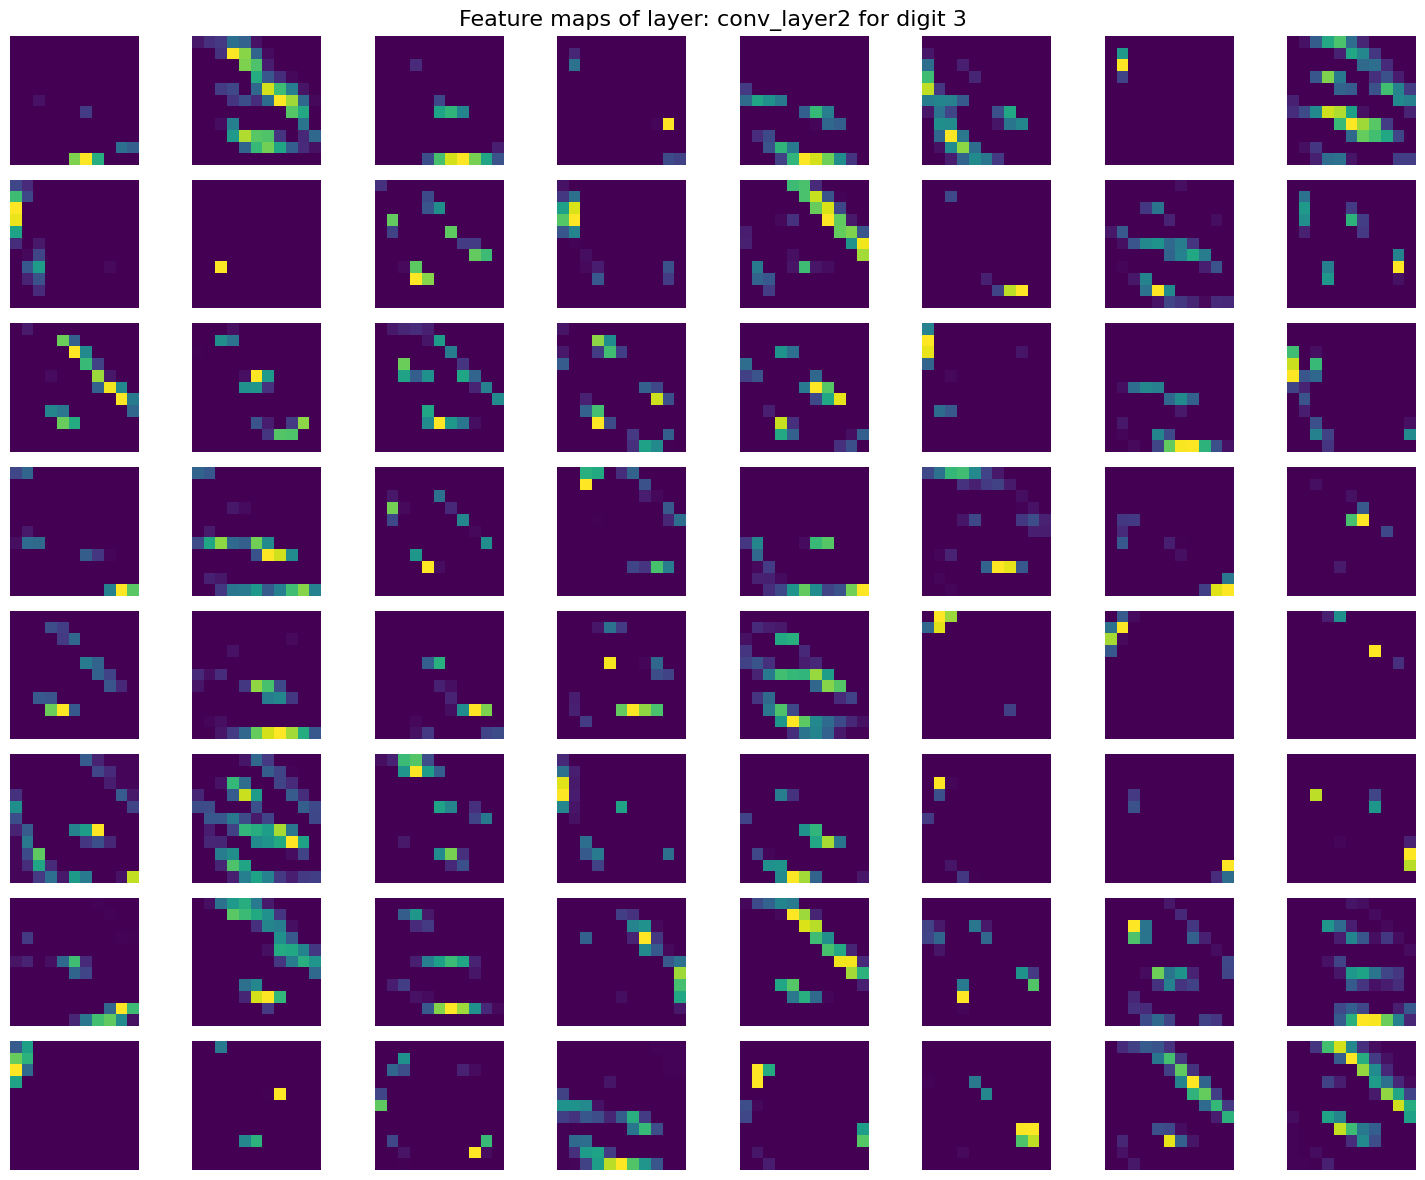

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


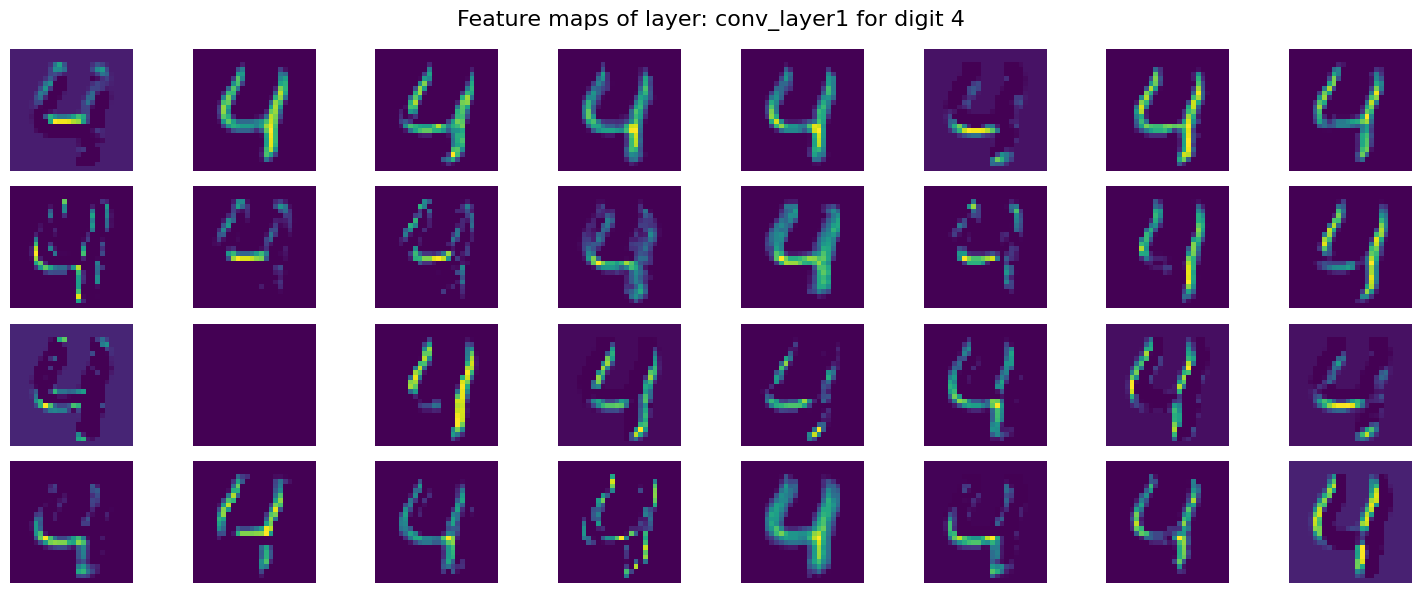

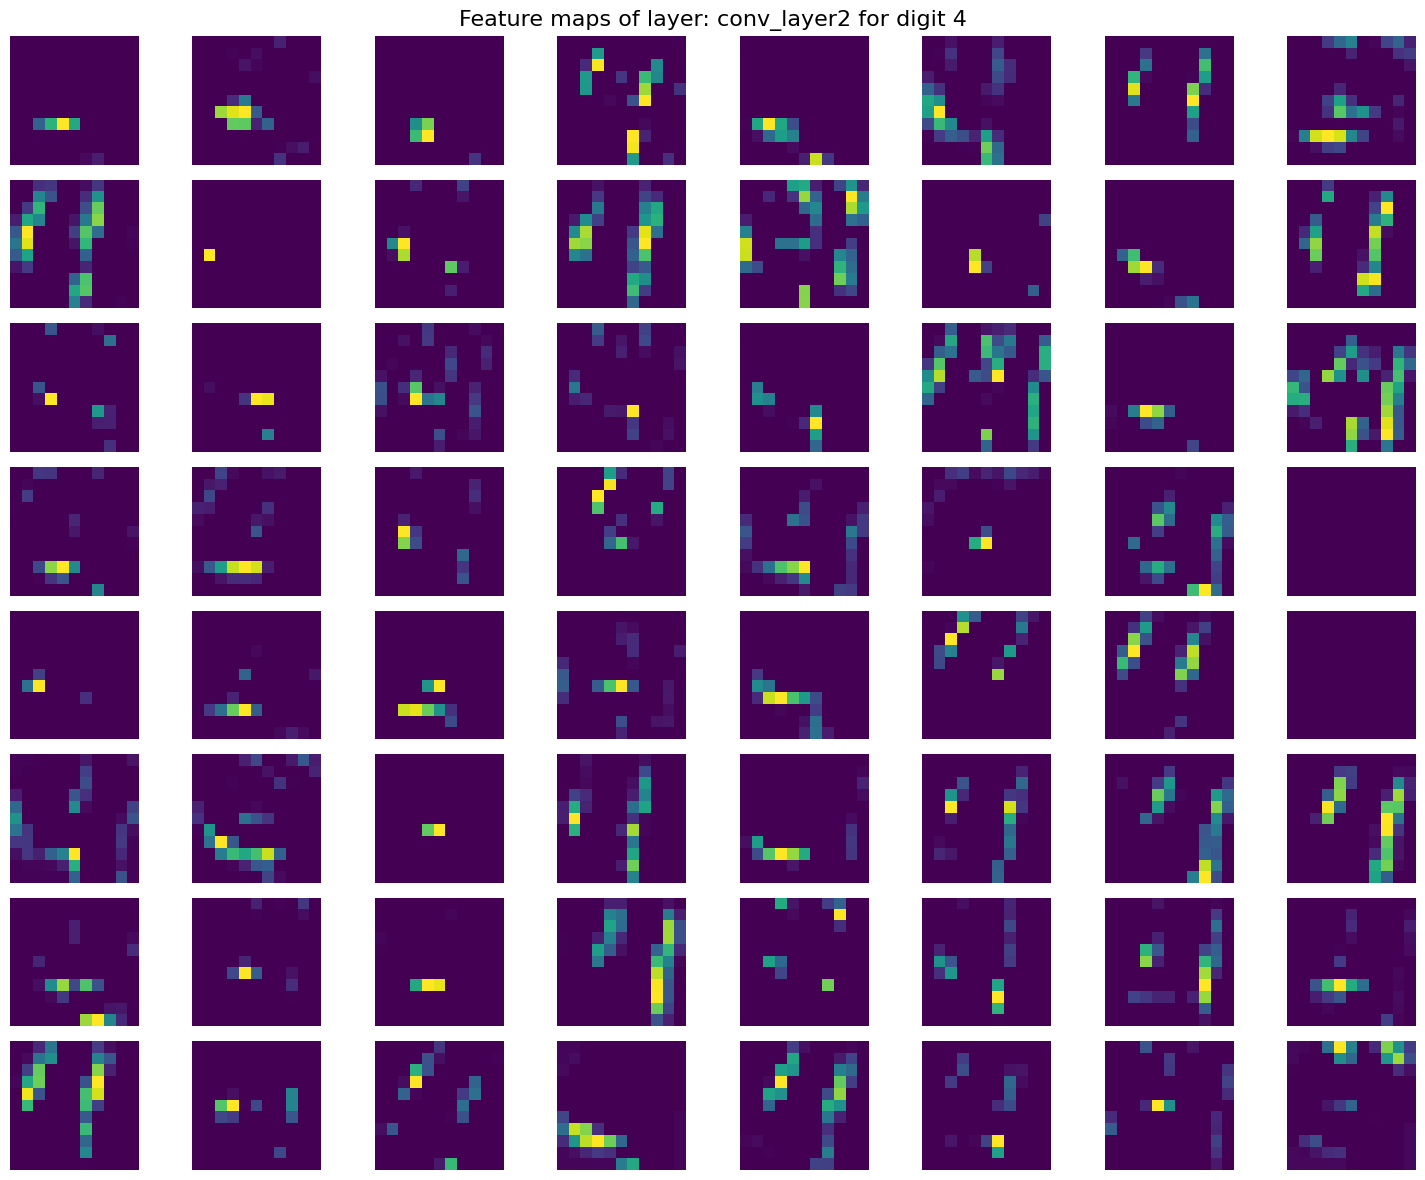

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


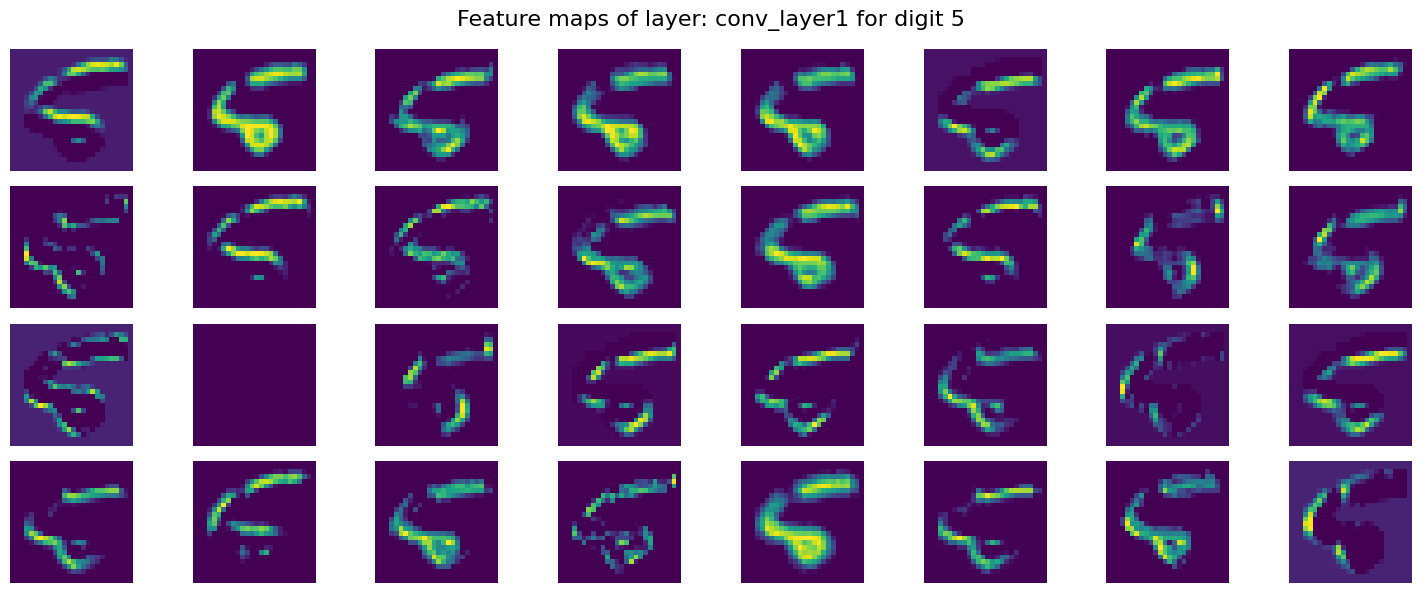

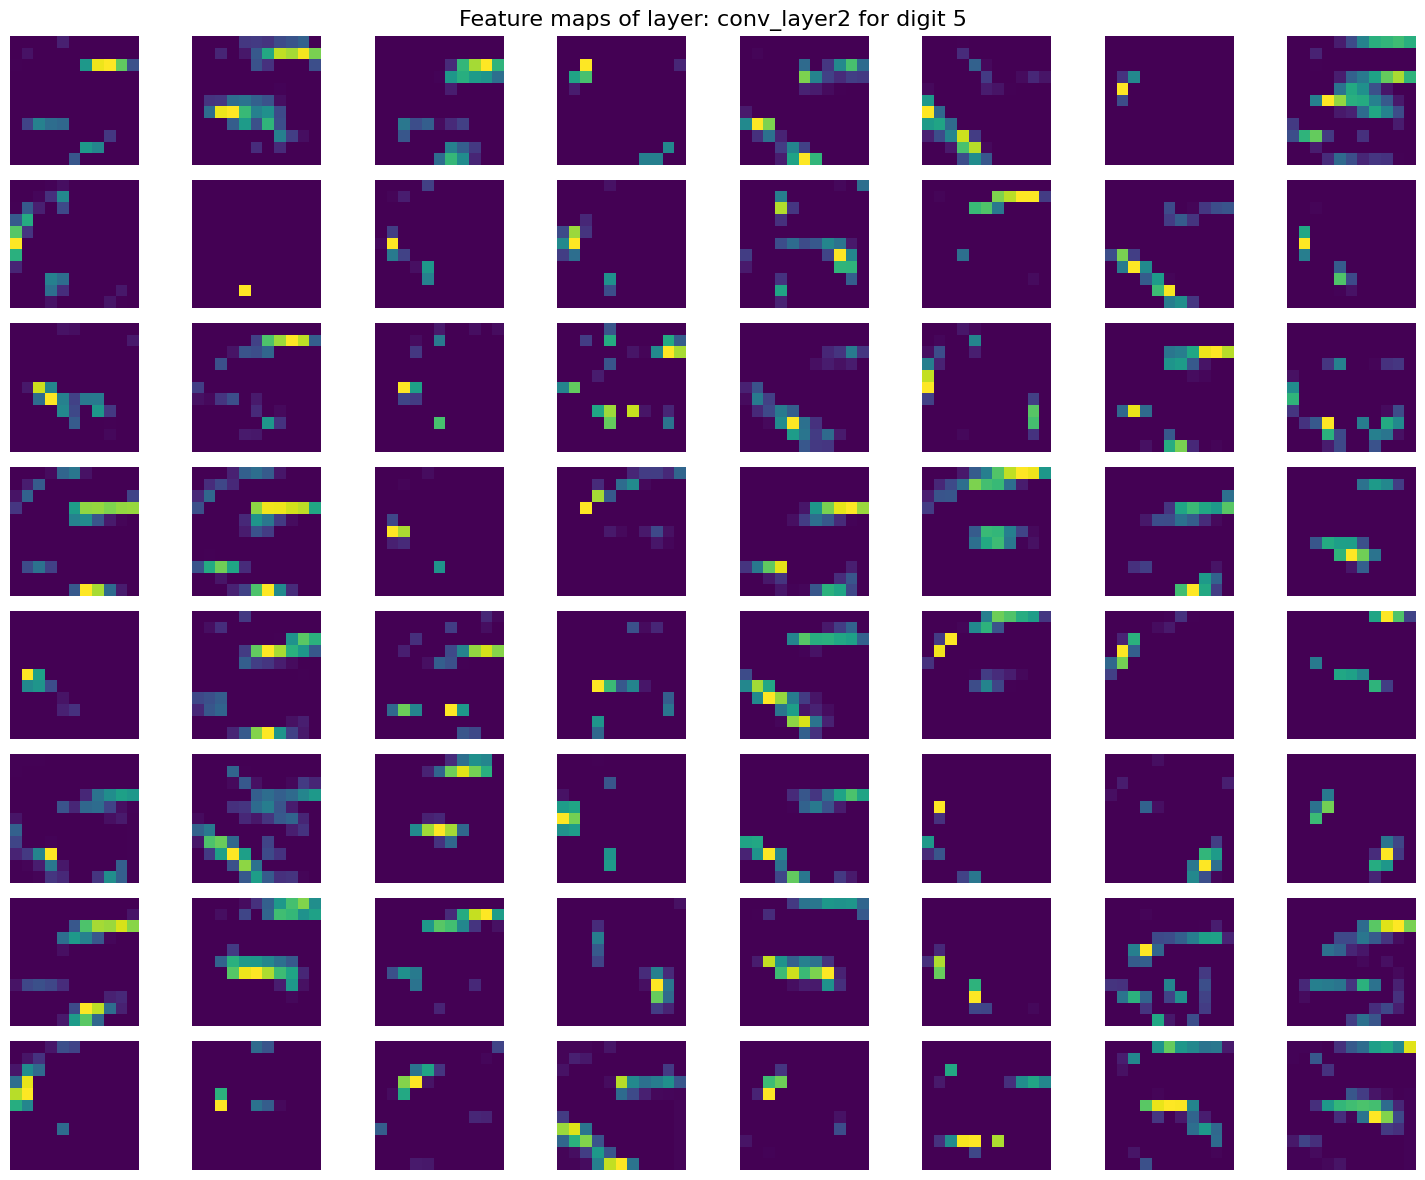

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


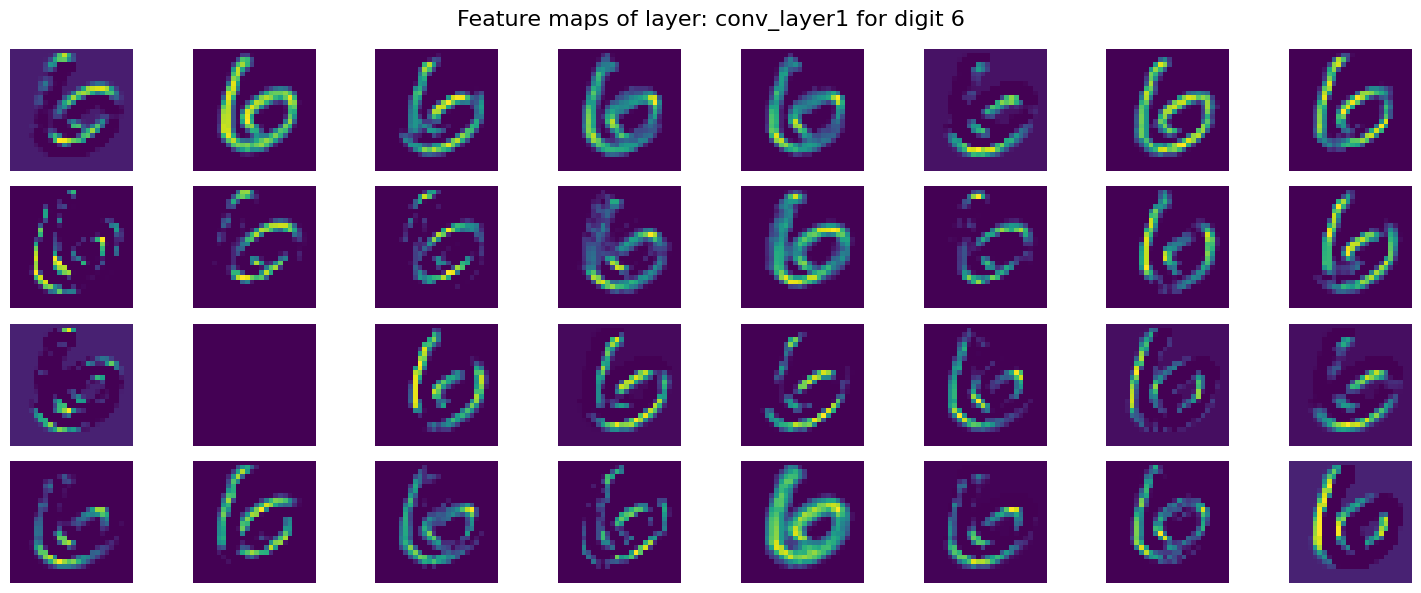

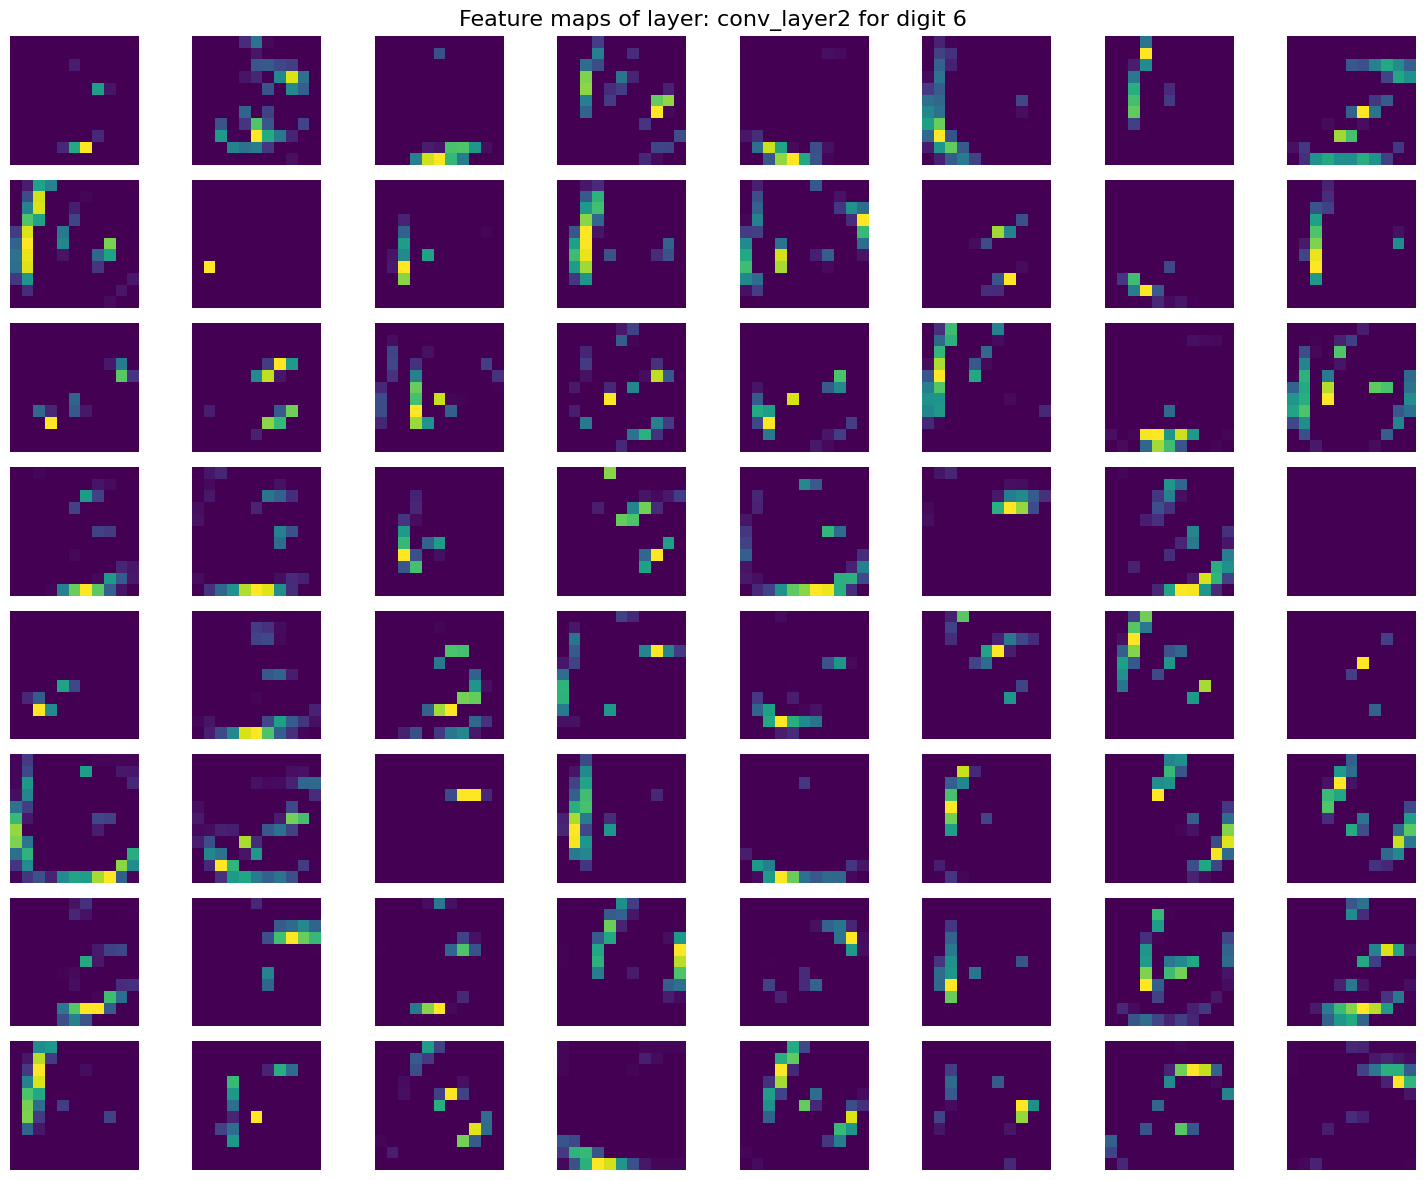

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


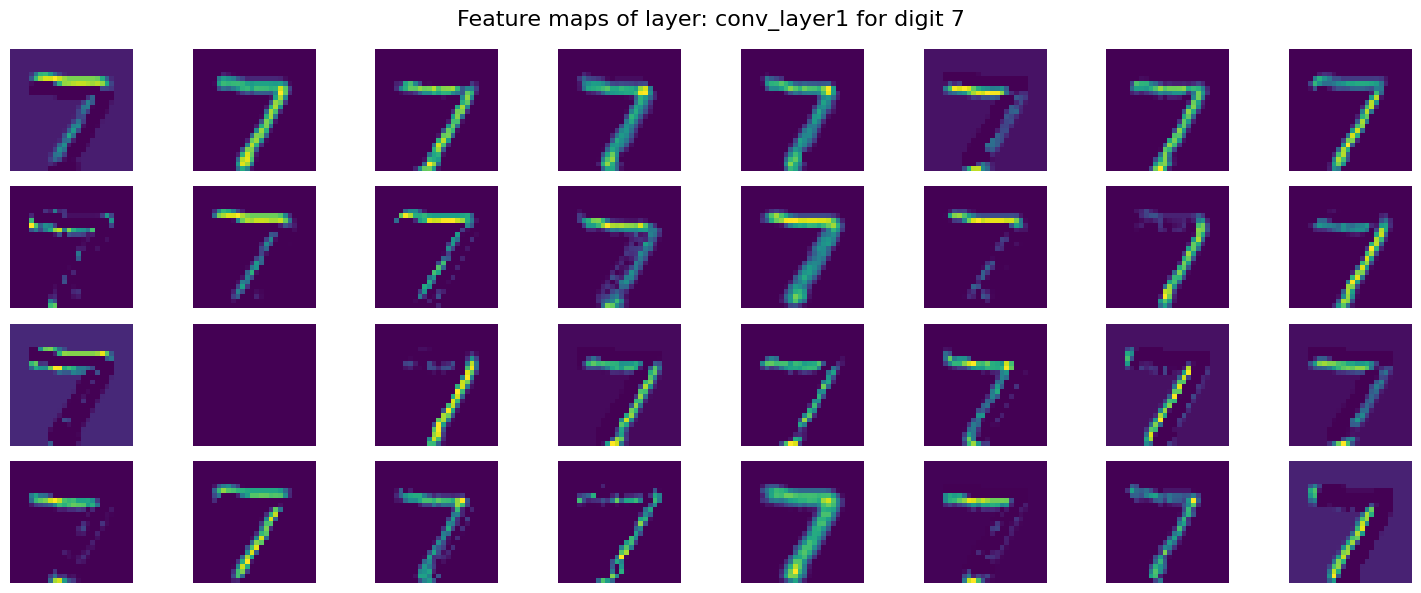

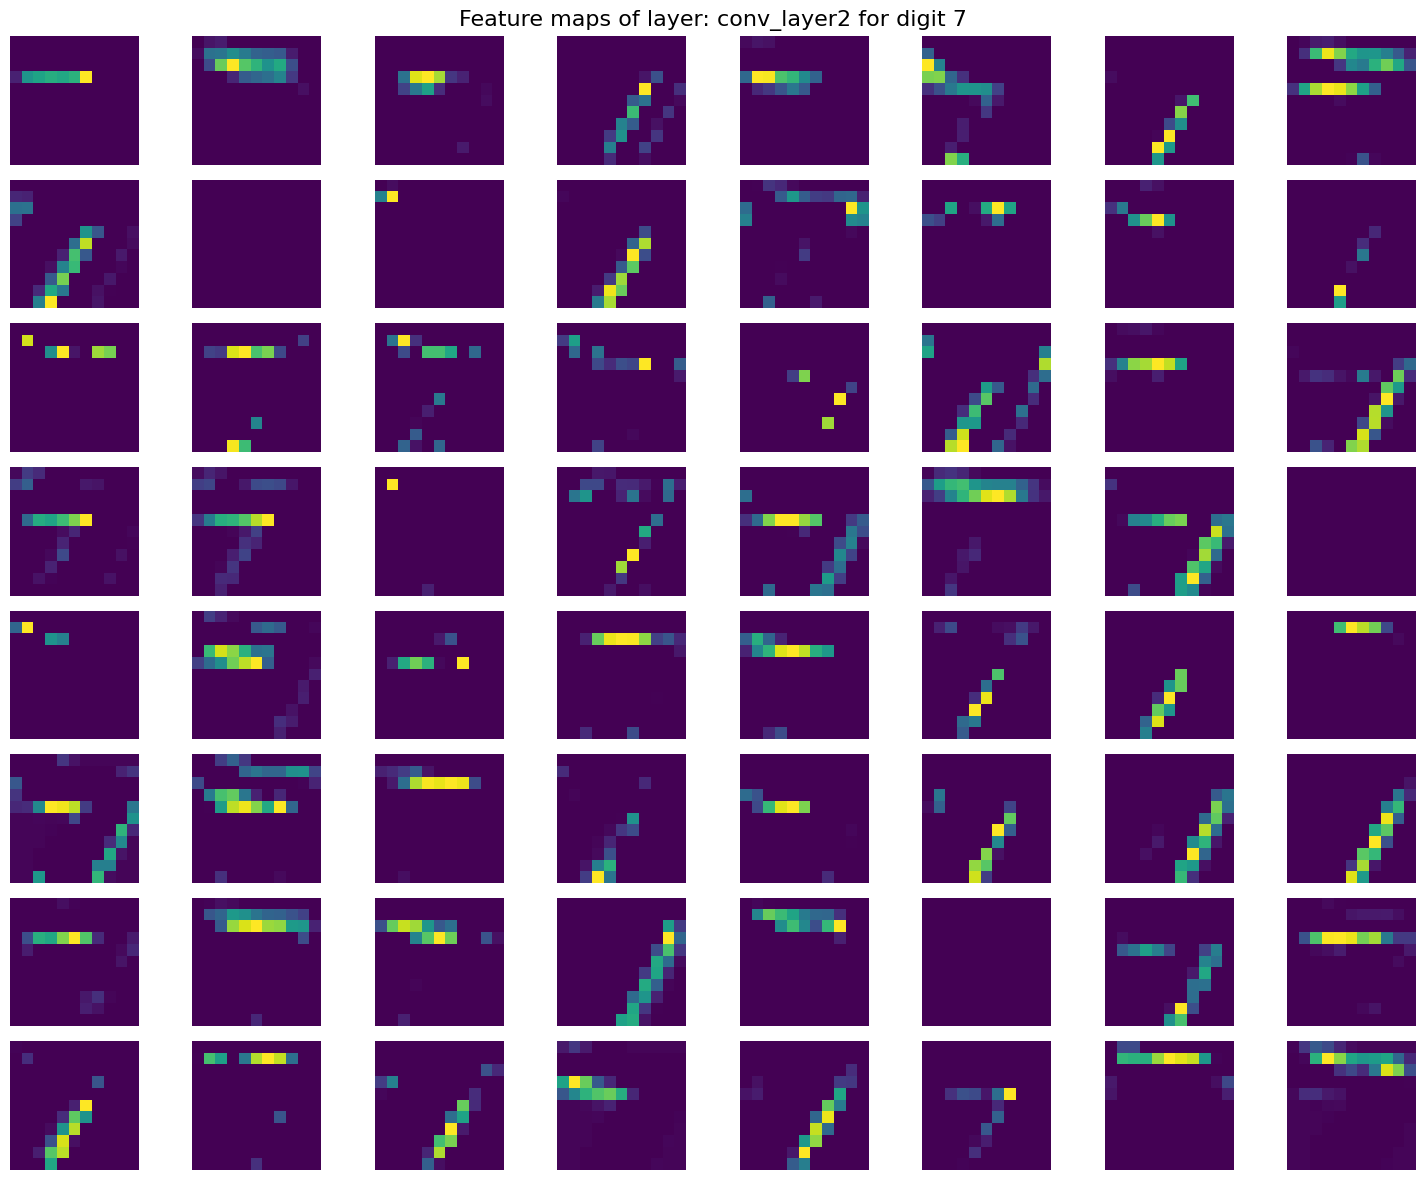

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


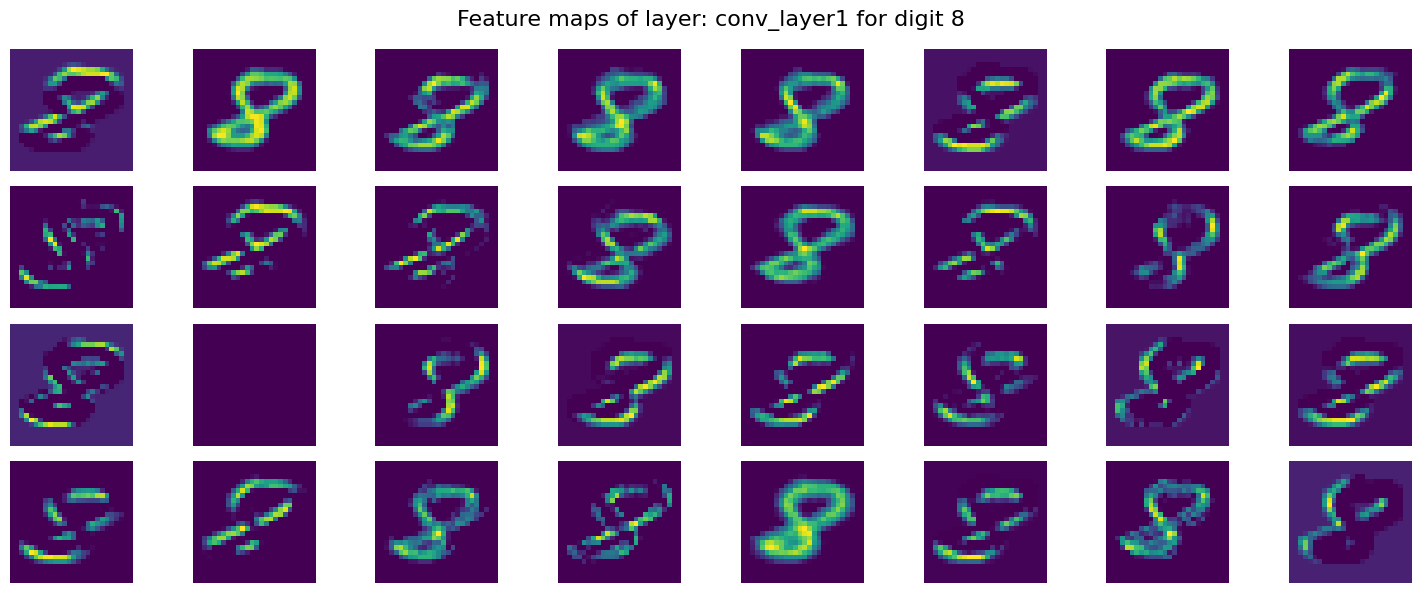

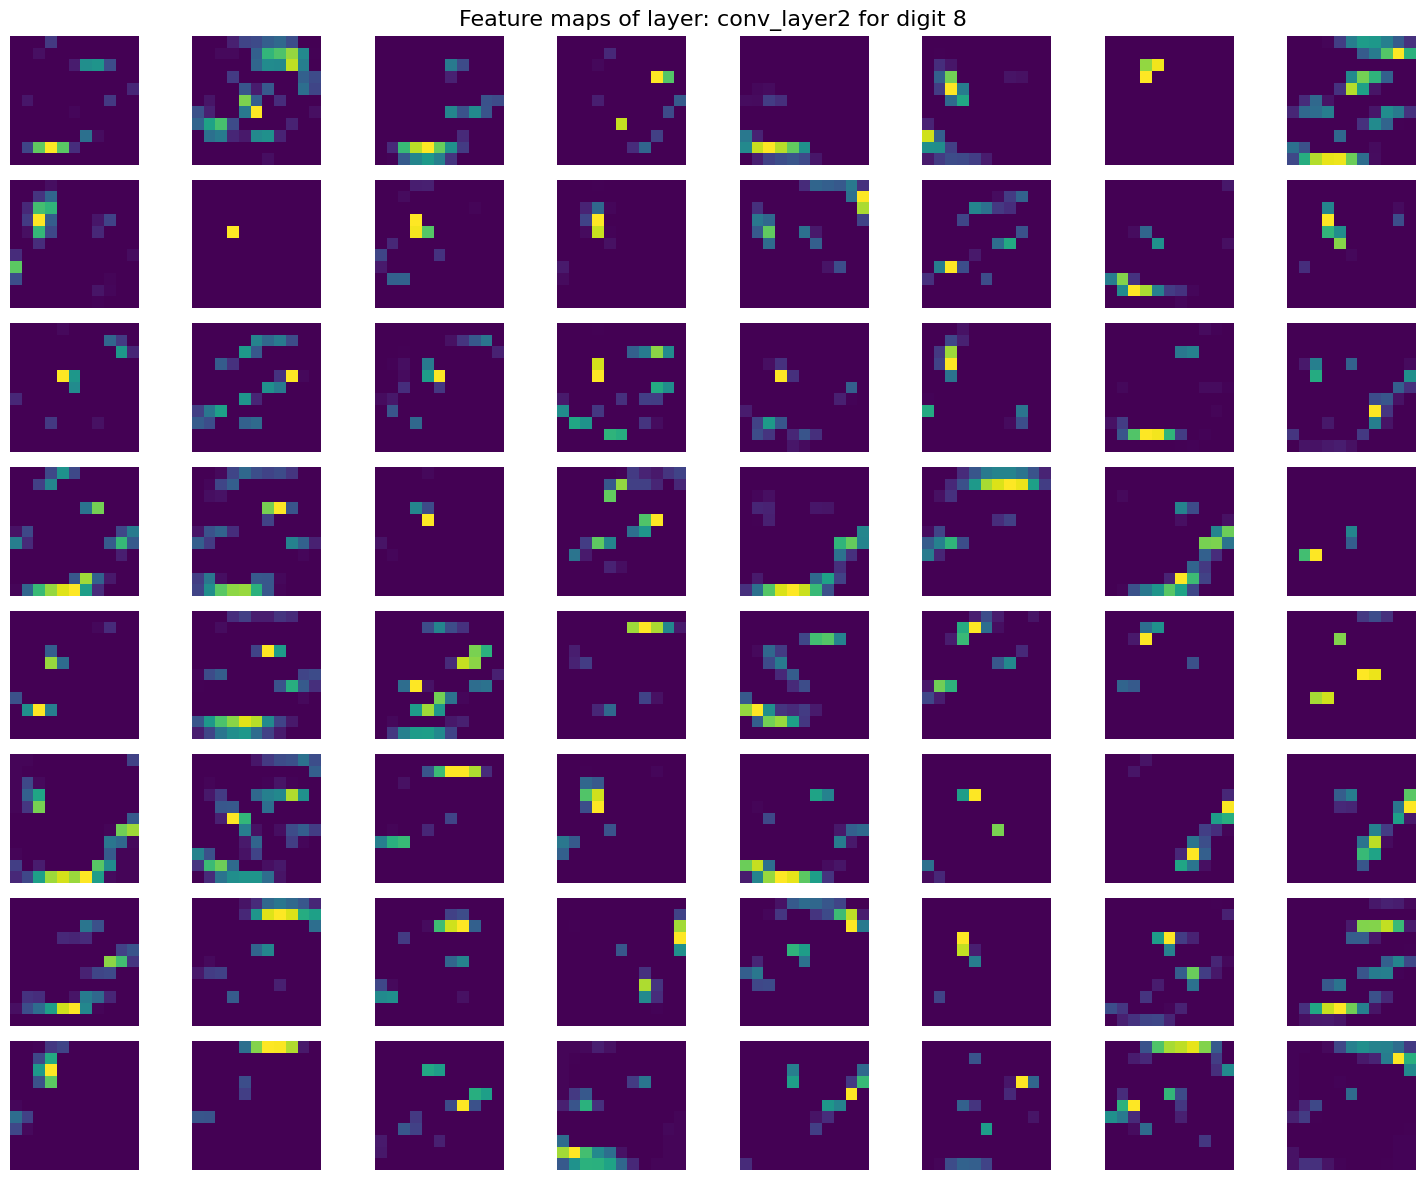

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


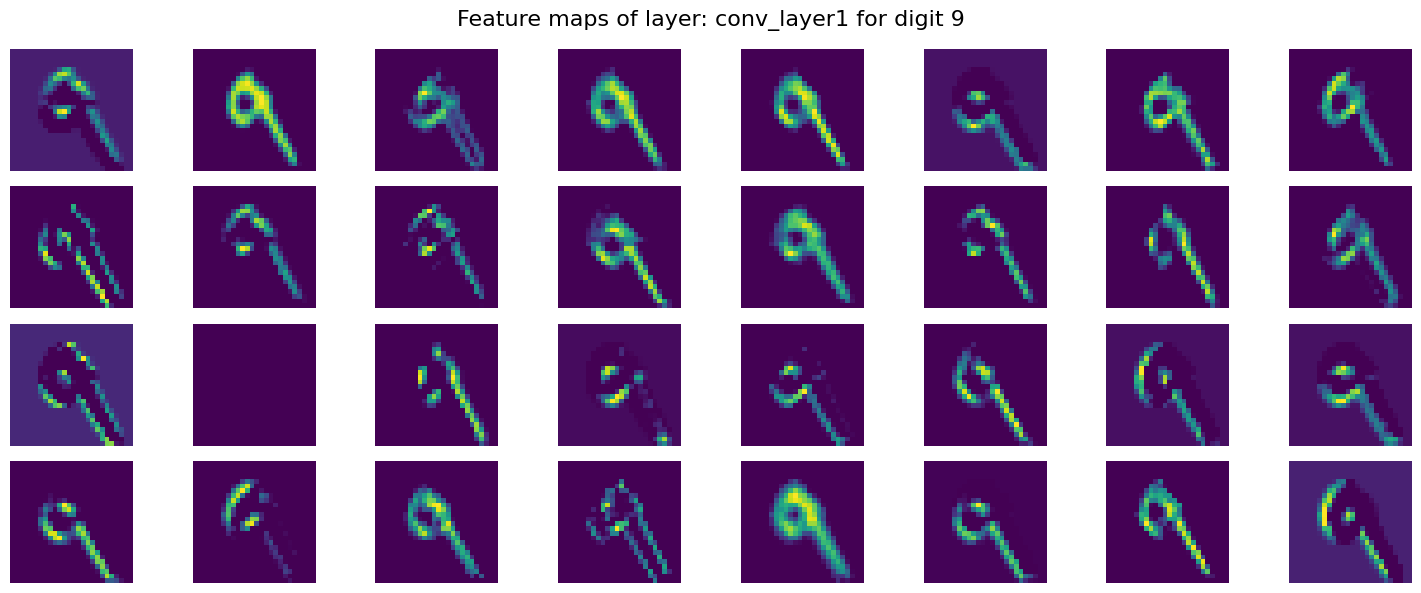

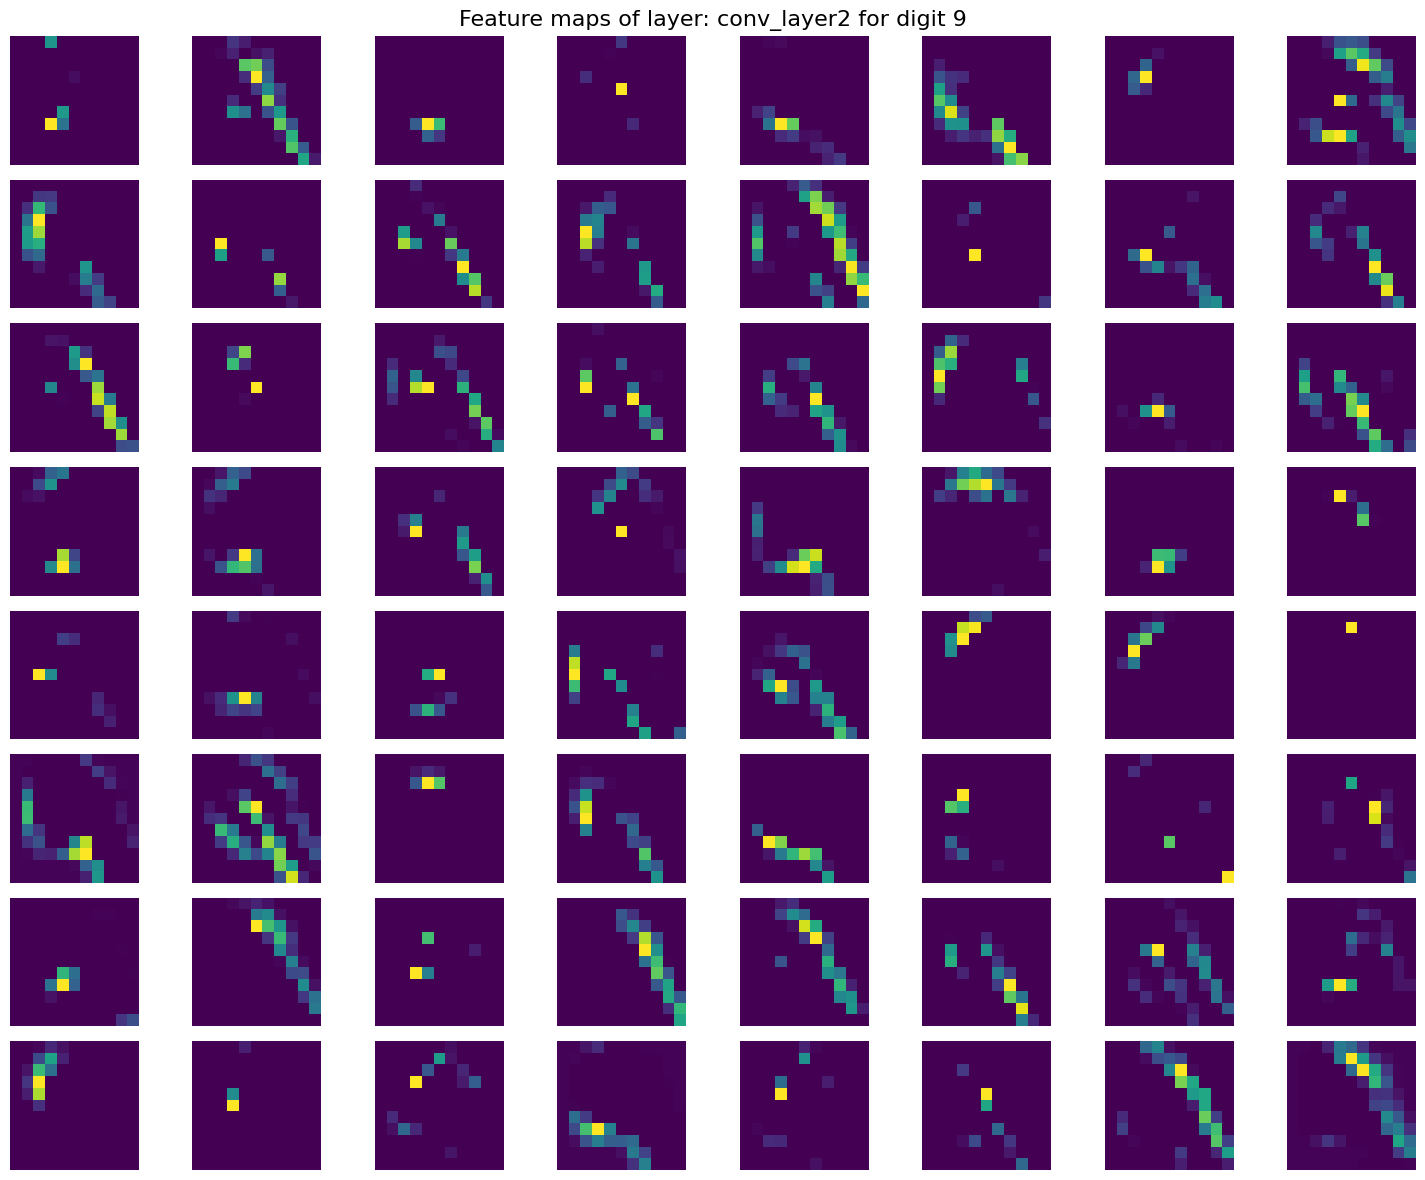

In [56]:
for img, label in images_per_class:
    visualize_feature_maps(img, label)


For Custom Dataset

Loading & preprocessing custom dataset

In [58]:
# Define the dataset path
dataset_path = "C:/Users/Standard User/OneDrive/Documents/IITJ/MTech/Sem3/Deep Learning/Assignments/Assignment1/dataset/caltech-101"

# Parameters
image_size = (128, 128)
batch_size = 32

# Load the dataset
train_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

val_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

# Normalize the pixel values to [0, 1]
normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# Cache and prefetch to improve performance
train_dataset = train_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


Found 9144 files belonging to 102 classes.
Using 8230 files for training.
Found 9144 files belonging to 102 classes.
Using 914 files for validation.


New CNN

In [60]:
# Load the dataset
train_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

val_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

# Get class names and number of classes before any transformations
class_names = train_dataset.class_names
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")

# Normalize the pixel values to [0, 1]
normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# Cache and prefetch to improve performance
train_dataset = train_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


Found 9144 files belonging to 102 classes.
Using 8230 files for training.
Found 9144 files belonging to 102 classes.
Using 914 files for validation.
Number of classes: 102


In [61]:
# Define the CNN model
def create_custom_cnn_model(num_classes):
    model = models.Sequential([
        layers.Input(shape=(128, 128, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', name='conv_layer1'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', name='conv_layer2'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Create the model
custom_model = create_custom_cnn_model(num_classes)

# Compile the model
custom_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [63]:
# Train the model (keep epochs low to reduce runtime)
custom_model.fit(train_dataset, epochs=5, validation_data=val_dataset)

# Build the model by calling it on a sample input
for images, labels in train_dataset.take(1):
    sample_input = images[0:1]  # Take the first image in the batch
    break
custom_model.predict(sample_input)


Epoch 1/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 50s 195ms/step - accuracy: 0.9310 - loss: 0.2616 - val_accuracy: 0.4825 - val_loss: 3.7842
Epoch 2/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 44s 171ms/step - accuracy: 0.9568 - loss: 0.1591 - val_accuracy: 0.5098 - val_loss: 3.8386
Epoch 3/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 45s 173ms/step - accuracy: 0.9740 - loss: 0.0901 - val_accuracy: 0.4945 - val_loss: 4.1028
Epoch 4/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 51s 199ms/step - accuracy: 0.9790 - loss: 0.0852 - val_accuracy: 0.5098 - val_loss: 4.1723
Epoch 5/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 49s 192ms/step - accuracy: 0.9899 - loss: 0.0456 - val_accuracy: 0.5088 - val_loss: 4.2456
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[4.8709882e-04, 1.0508083e-08, 3.0027031e-12, 2.5425462e-11,
        4.7662820e-06, 2.4722369e-09, 9.2180981e-06, 2.8910342e-04,
        2.1706992e-06, 2.0849851e-11, 8.1122970e-08, 4.5529669e-05,
        2.0644940e-08, 2.1229278e-10, 1.1518176e-08, 3.8864414e-07,
        1.4283036e-10, 8.2095817e-04, 7.4381991e-05, 1.1095917e-05,
        1.7260921e-07, 1.7403659e-08, 2.5387905e-11, 6.3057098e-04,
        9.6162232e-08, 1.9757458e-07, 4.5948359e-06, 2.7457252e-06,
        9.1737292e-08, 1.1864003e-05, 4.4015580e-04, 1.2061320e-05,
        7.3011100e-02, 5.4769574e-05, 4.3203400e-08, 3.2623036e-11,
        5.3162570e-03, 5.7824888e-08, 9.9651379e-07, 4.1729042e-09,
        5.7763789e-09, 2.5664440e-06, 3.7395861e-07, 3.2875412e-06,
        1.5637328e-12, 1.8990348e-05, 9.1720403e-10, 5.9416575e-06,
        1.2196415e-06, 3.0586131e-07, 2.1042258e-07, 5.8049784e-04,
        9.9415593e-07, 1.4975711e-05, 1.5062049e-07, 5.1197194e-08,
        4.7080929e-12, 3.7945749e-10, 7.7474460e

Creating activation Model

In [68]:
sample_input = tf.zeros((1, 128, 128, 3))
custom_model.predict(sample_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[4.6719518e-03, 1.6892270e-06, 5.7700908e-07, 2.6609964e-06,
        4.7529070e-07, 1.7258426e-04, 1.3842566e-07, 4.1266223e-03,
        1.7450911e-03, 9.4303839e-02, 4.1654789e-06, 3.5730849e-05,
        1.1853671e-06, 1.9514635e-05, 2.3403755e-04, 9.6369308e-04,
        3.8424105e-04, 6.4377826e-05, 1.1966127e-06, 2.1006967e-05,
        6.6877448e-07, 3.0877723e-06, 9.0843523e-06, 5.8314303e-04,
        8.9826208e-04, 2.7768945e-04, 1.2137471e-04, 1.0327274e-05,
        2.5532085e-03, 4.4911212e-05, 7.4147189e-05, 4.9632336e-06,
        2.1911639e-05, 1.6209413e-05, 4.3813186e-05, 3.9224242e-06,
        1.7707101e-04, 3.5118006e-02, 2.7243773e-02, 3.3701115e-06,
        3.2334035e-06, 2.8344850e-05, 2.7202474e-04, 5.9060156e-03,
        2.6559510e-06, 2.1387296e-04, 2.3630425e-06, 1.0425806e-05,
        4.1655763e-05, 4.9396948e-04, 3.0226590e-02, 5.1723729e-04,
        5.8667315e-03, 6.7943962e-05, 4.1230633e-06, 8.1618637e-05,
        1.3188676e-06, 1.7572656e-04, 3.3073348e

In [71]:
activation_model = models.Model(inputs=custom_model.layers[0].input, outputs=layer_outputs)


In [72]:
# Select images from the first few classes
num_classes_to_visualize = 5
images_per_class = {}

# Iterate over the dataset to collect images
for images, labels in train_dataset.unbatch():
    label = labels.numpy()
    if label not in images_per_class:
        images_per_class[label] = images.numpy()
    if len(images_per_class) >= num_classes_to_visualize:
        break

print(f"Collected images for {len(images_per_class)} classes.")


Collected images for 5 classes.


In [73]:
# Map labels to class names
label_to_class_name = dict(enumerate(class_names))

# Prepare images and labels
images_and_labels = []
for label, img in images_per_class.items():
    class_name = label_to_class_name[label]
    images_and_labels.append((img, label, class_name))


In [74]:
def visualize_feature_maps_custom(image, label, class_name):
    # Expand dimensions to match the model's input shape
    img_tensor = np.expand_dims(image, axis=0)
    
    # Get the feature maps
    activations = activation_model.predict(img_tensor)
    
    layer_names = ['conv_layer1', 'conv_layer2']
    
    for layer_name, activation in zip(layer_names, activations):
        num_filters = activation.shape[-1]
        size = activation.shape[1]
        
        # Set up a grid for displaying the feature maps
        cols = 8  # Number of columns in the grid
        rows = num_filters // cols + (num_filters % cols > 0)
        plt.figure(figsize=(15, rows * 1.5))
        plt.suptitle(f'Feature maps of layer: {layer_name} for class "{class_name}" (label {label})', fontsize=16)
        
        for i in range(min(num_filters, cols * rows)):
            plt.subplot(rows, cols, i + 1)
            plt.imshow(activation[0, :, :, i], cmap='viridis')
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


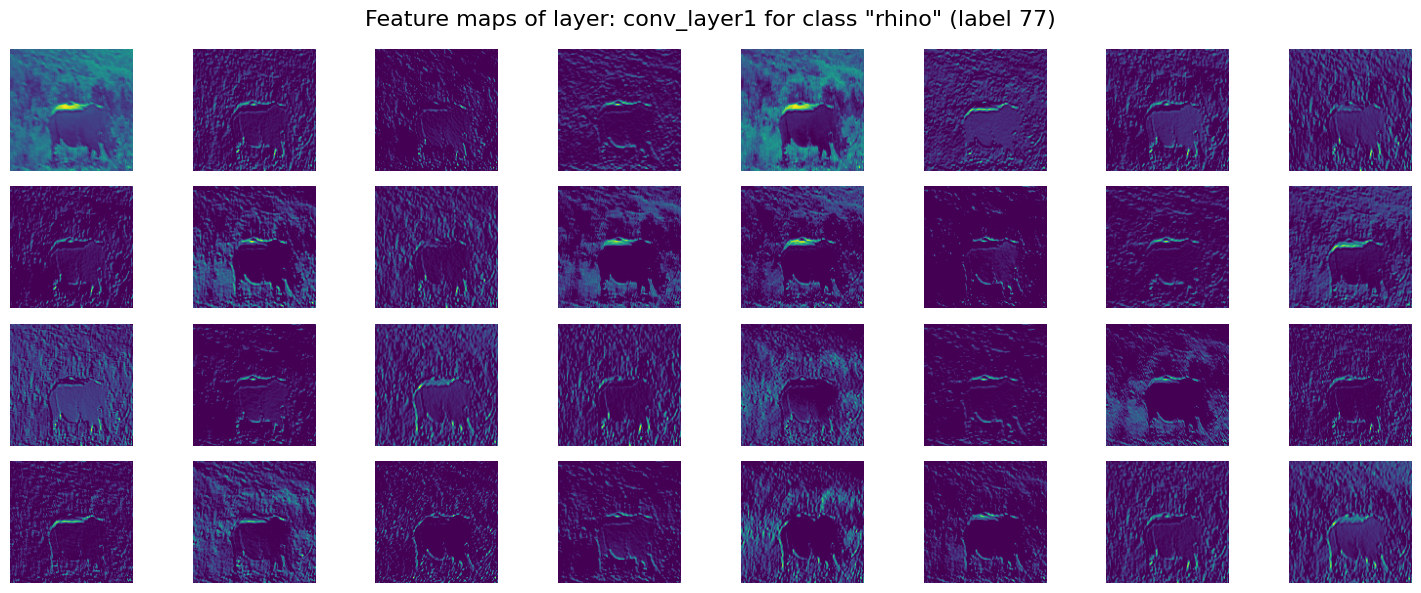

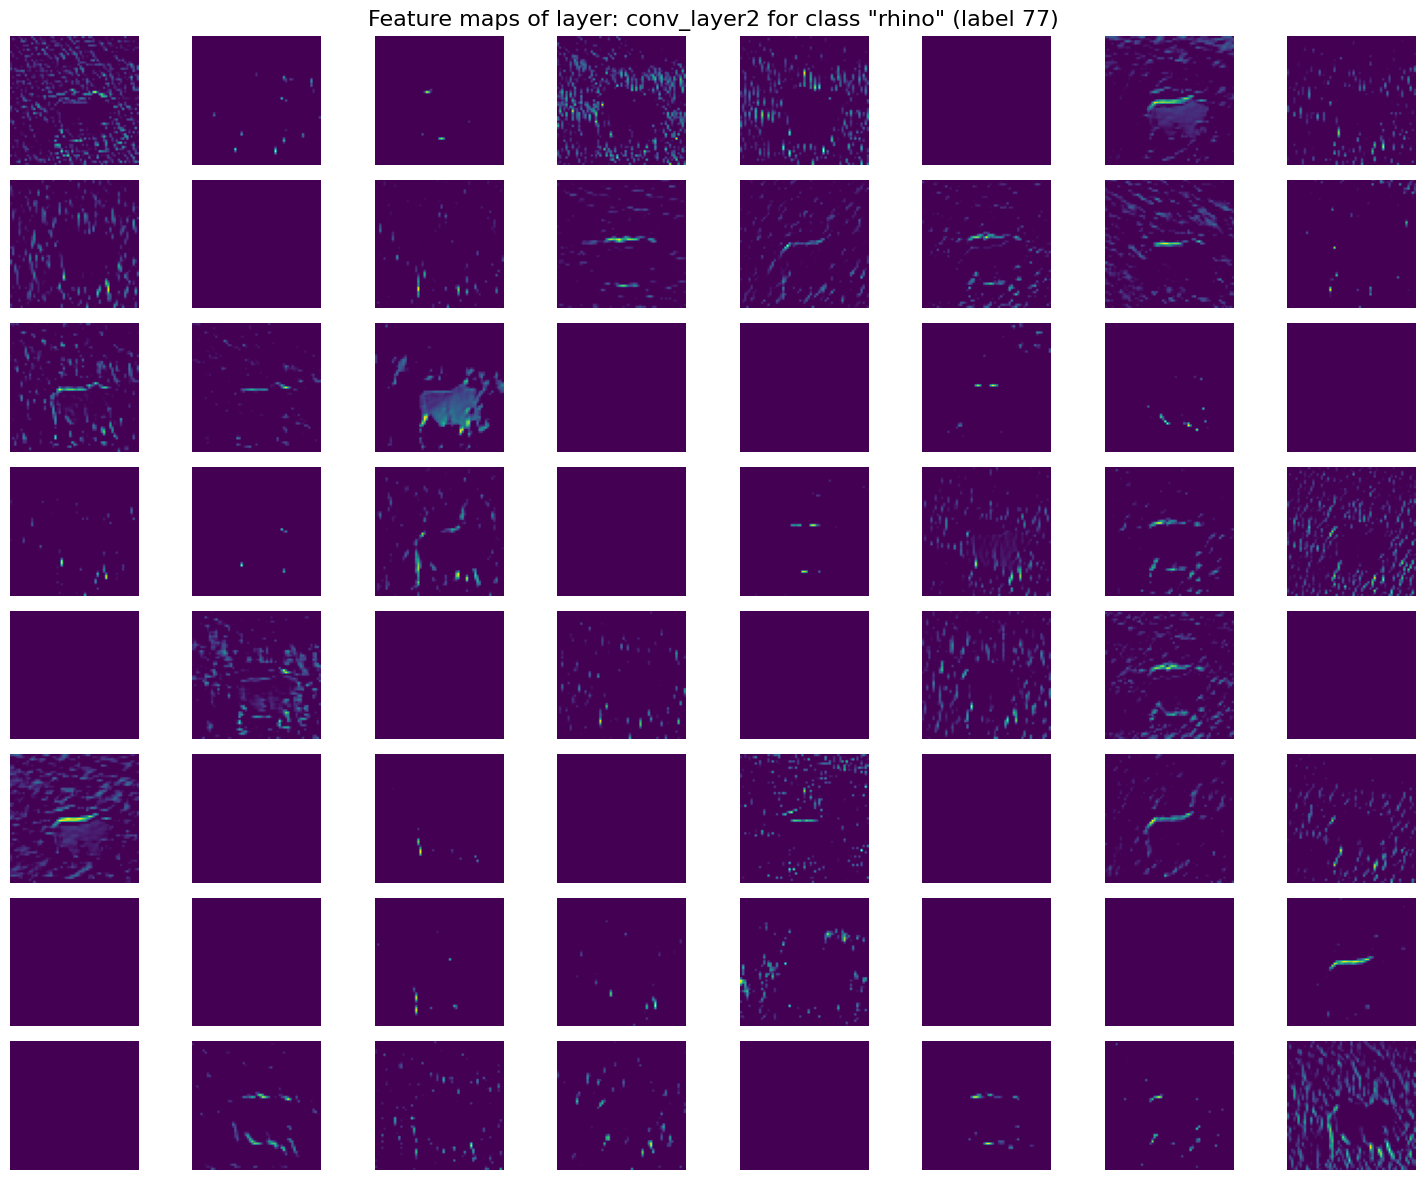

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


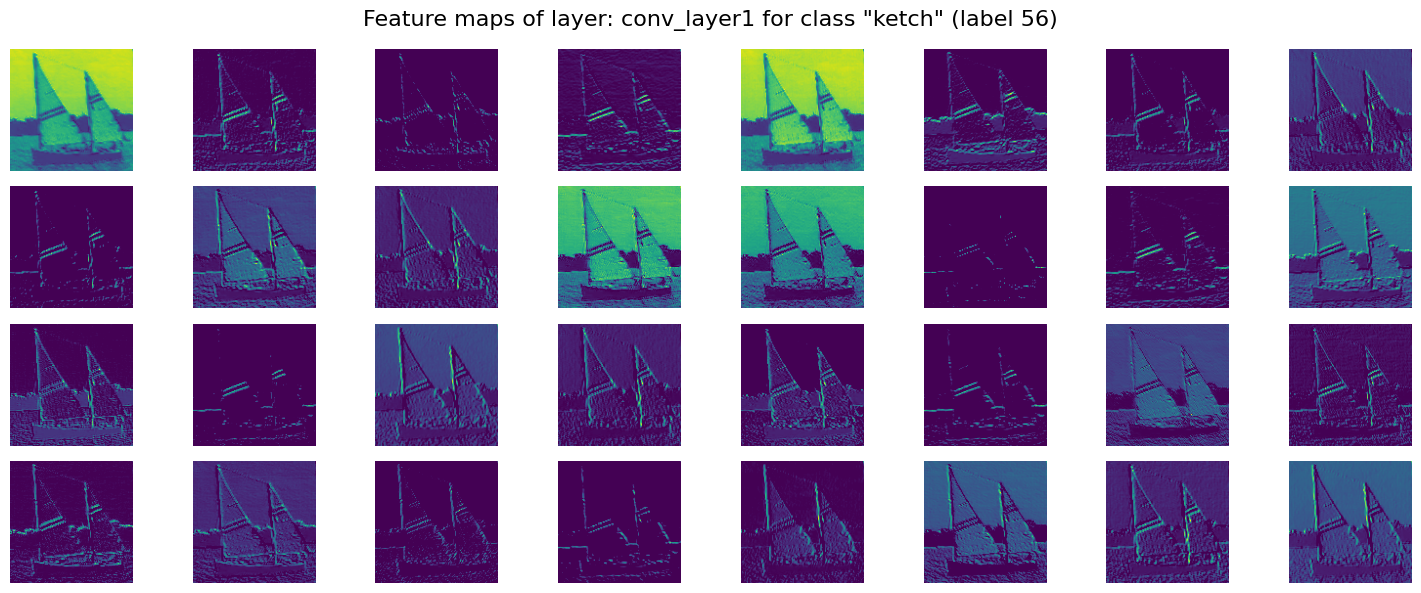

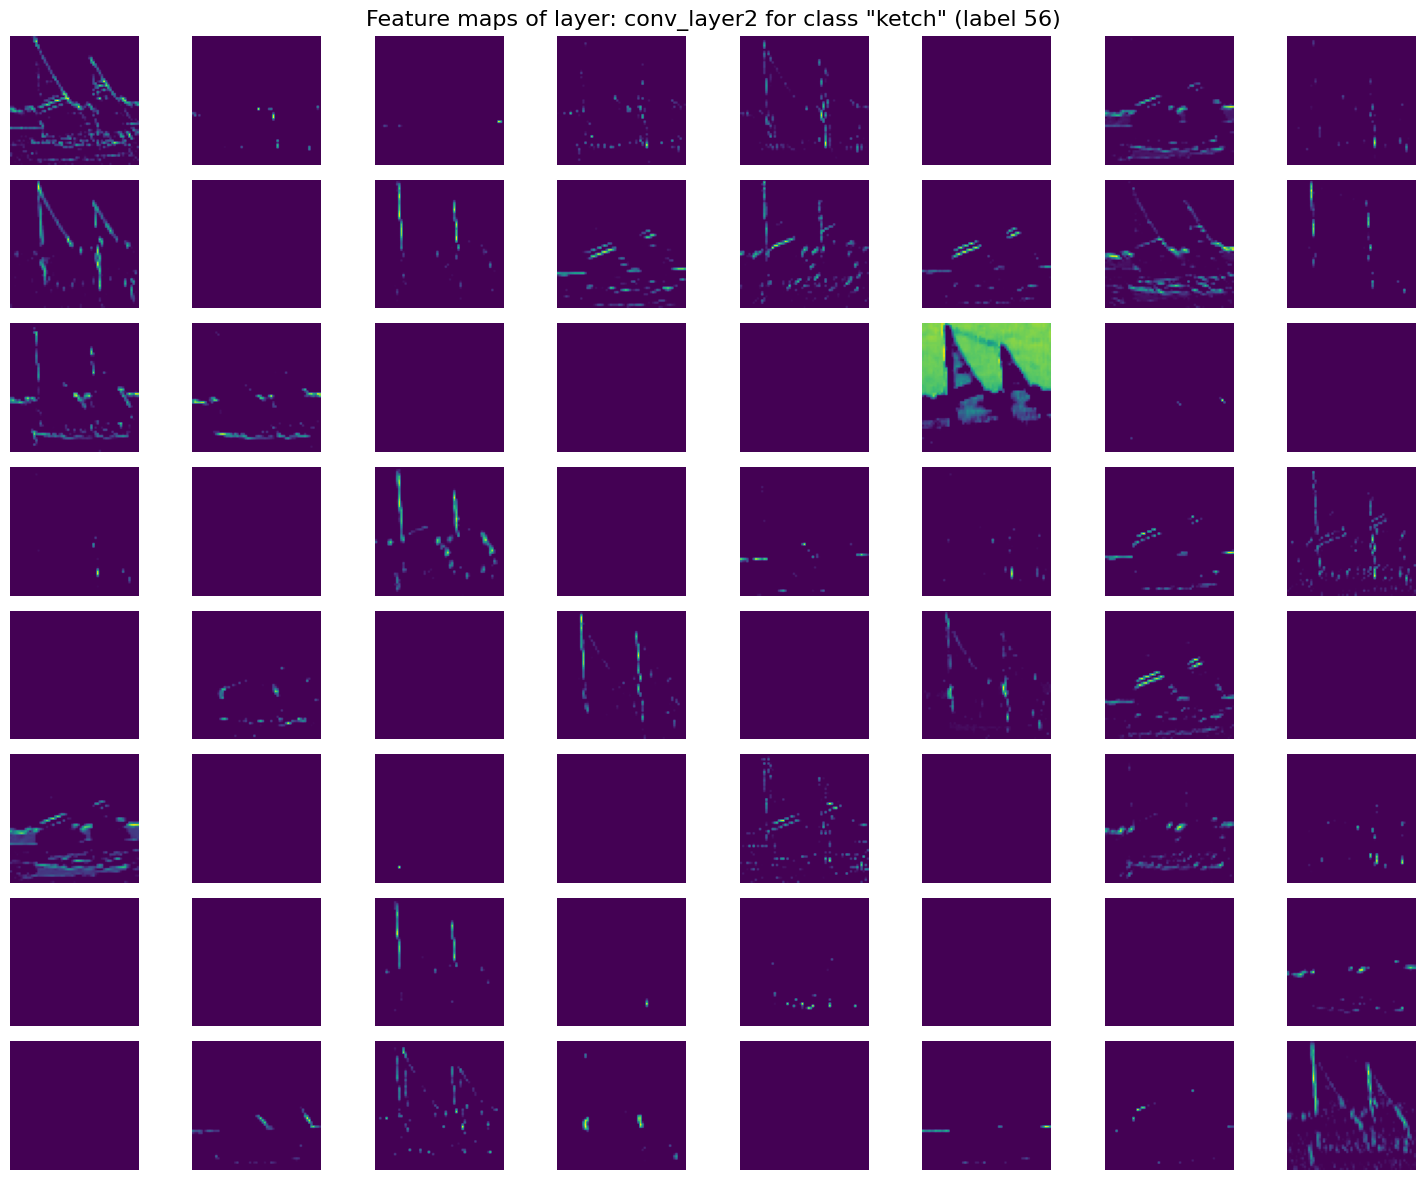

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


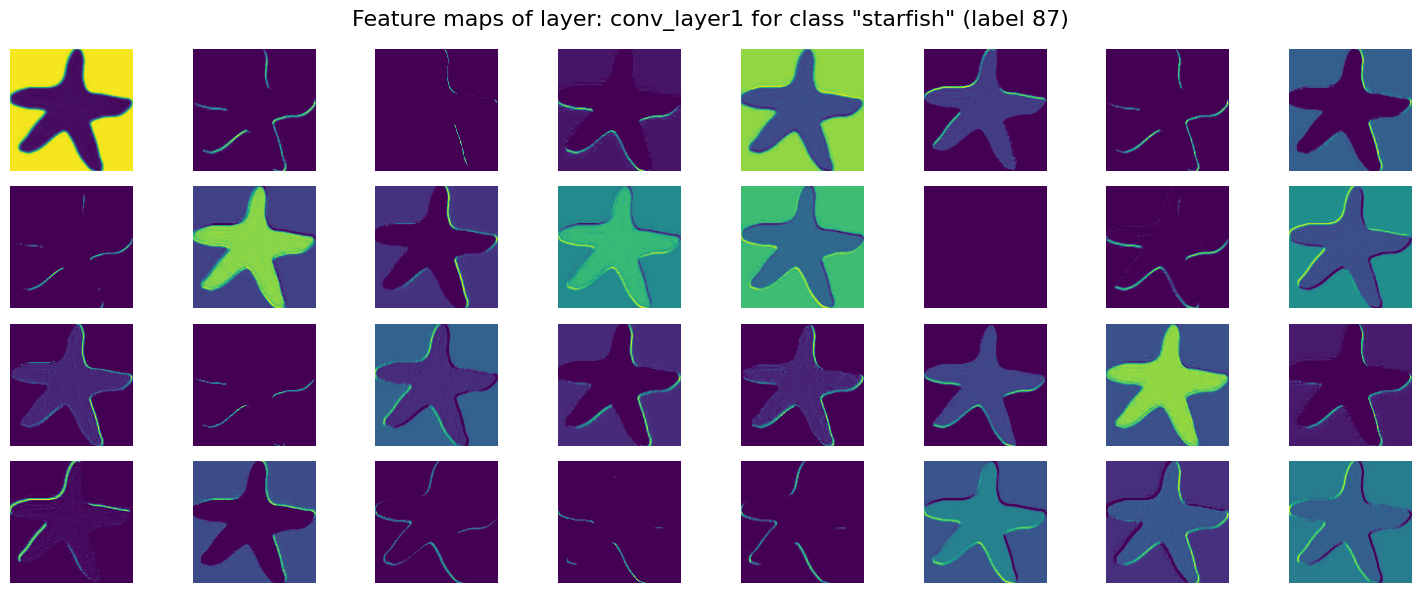

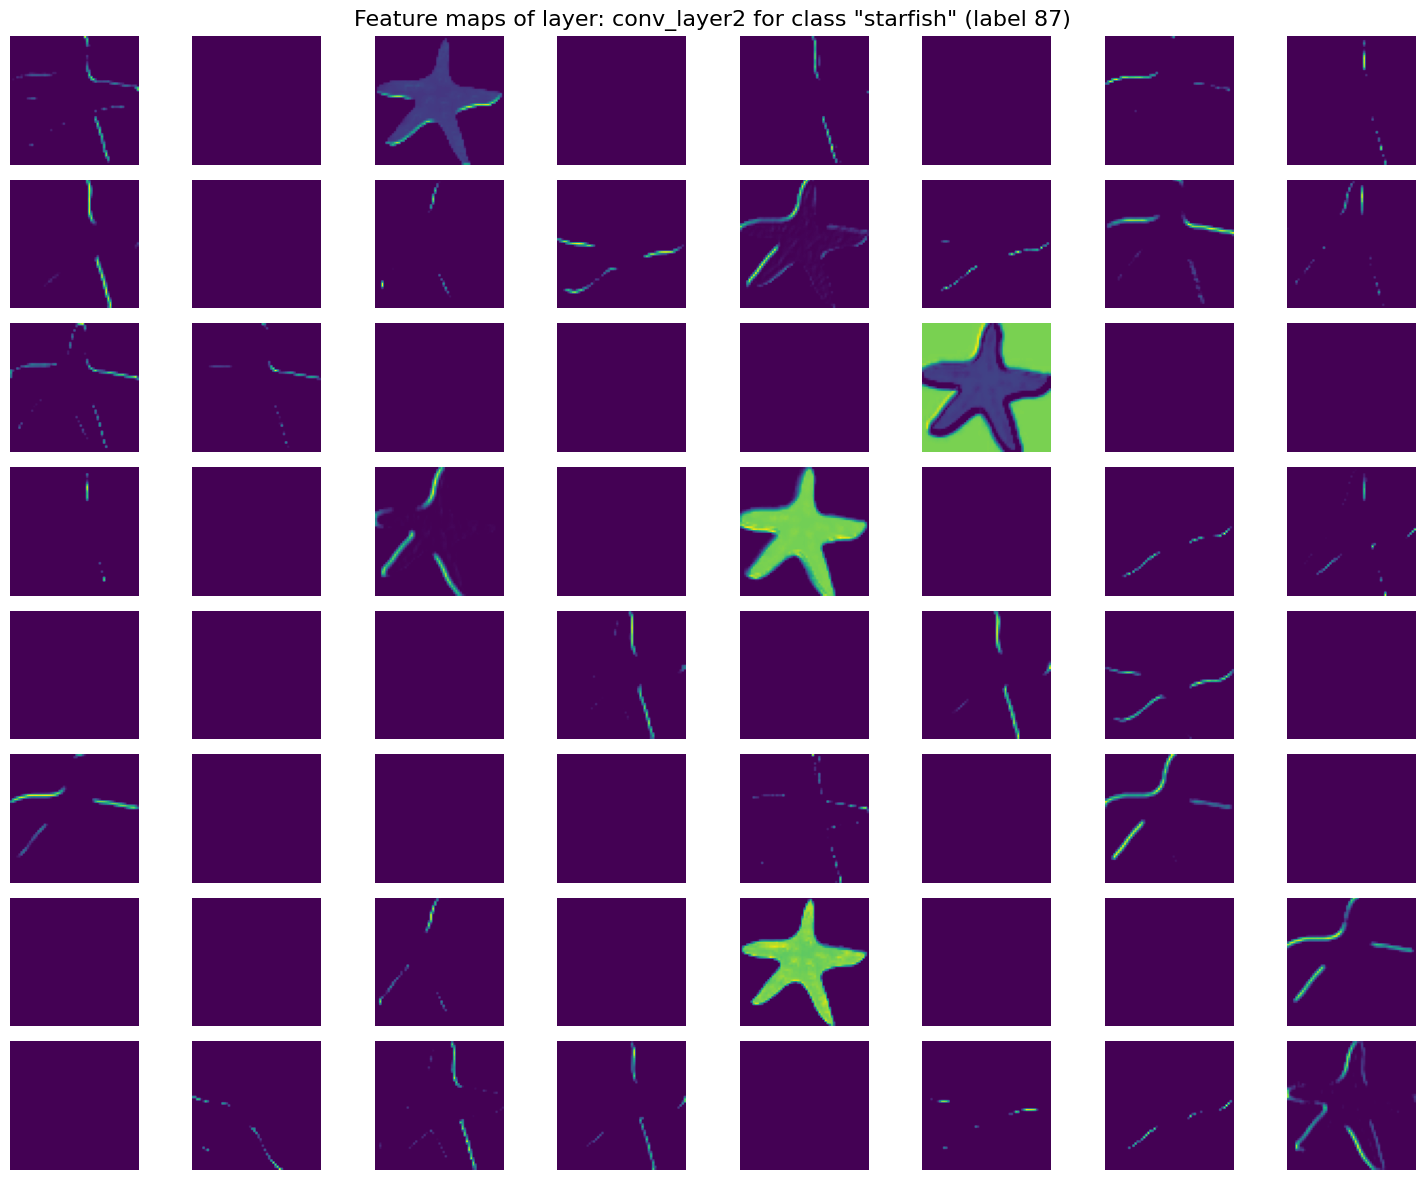

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


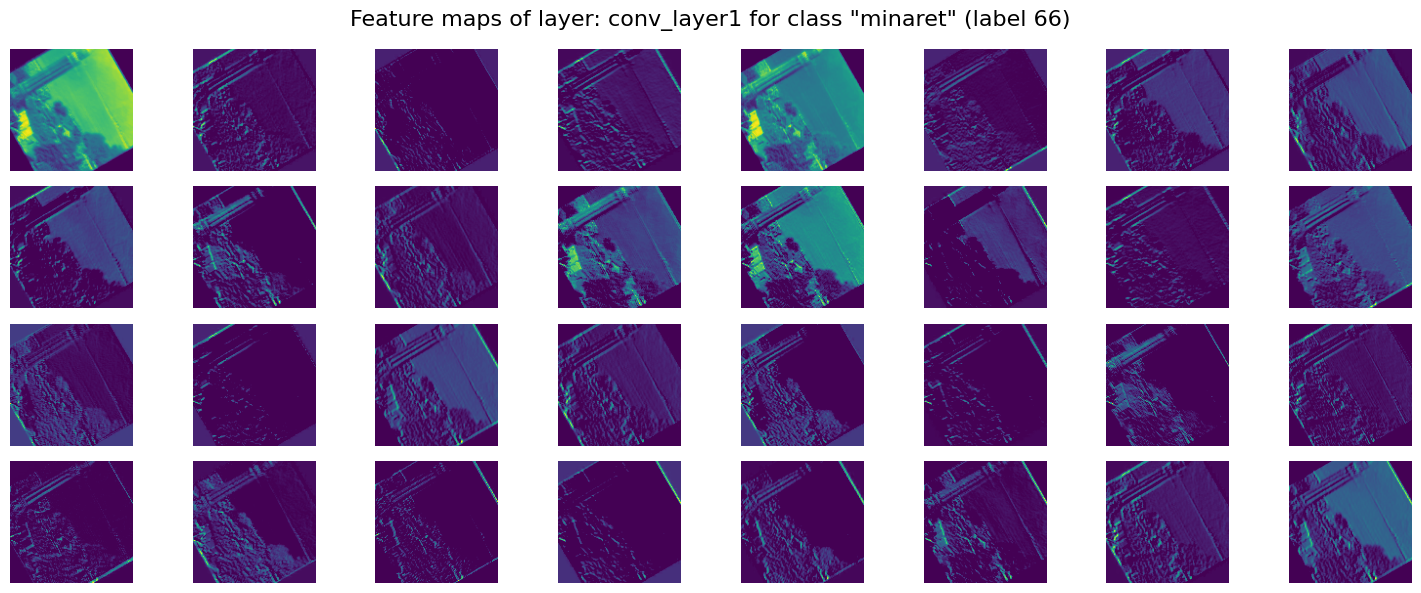

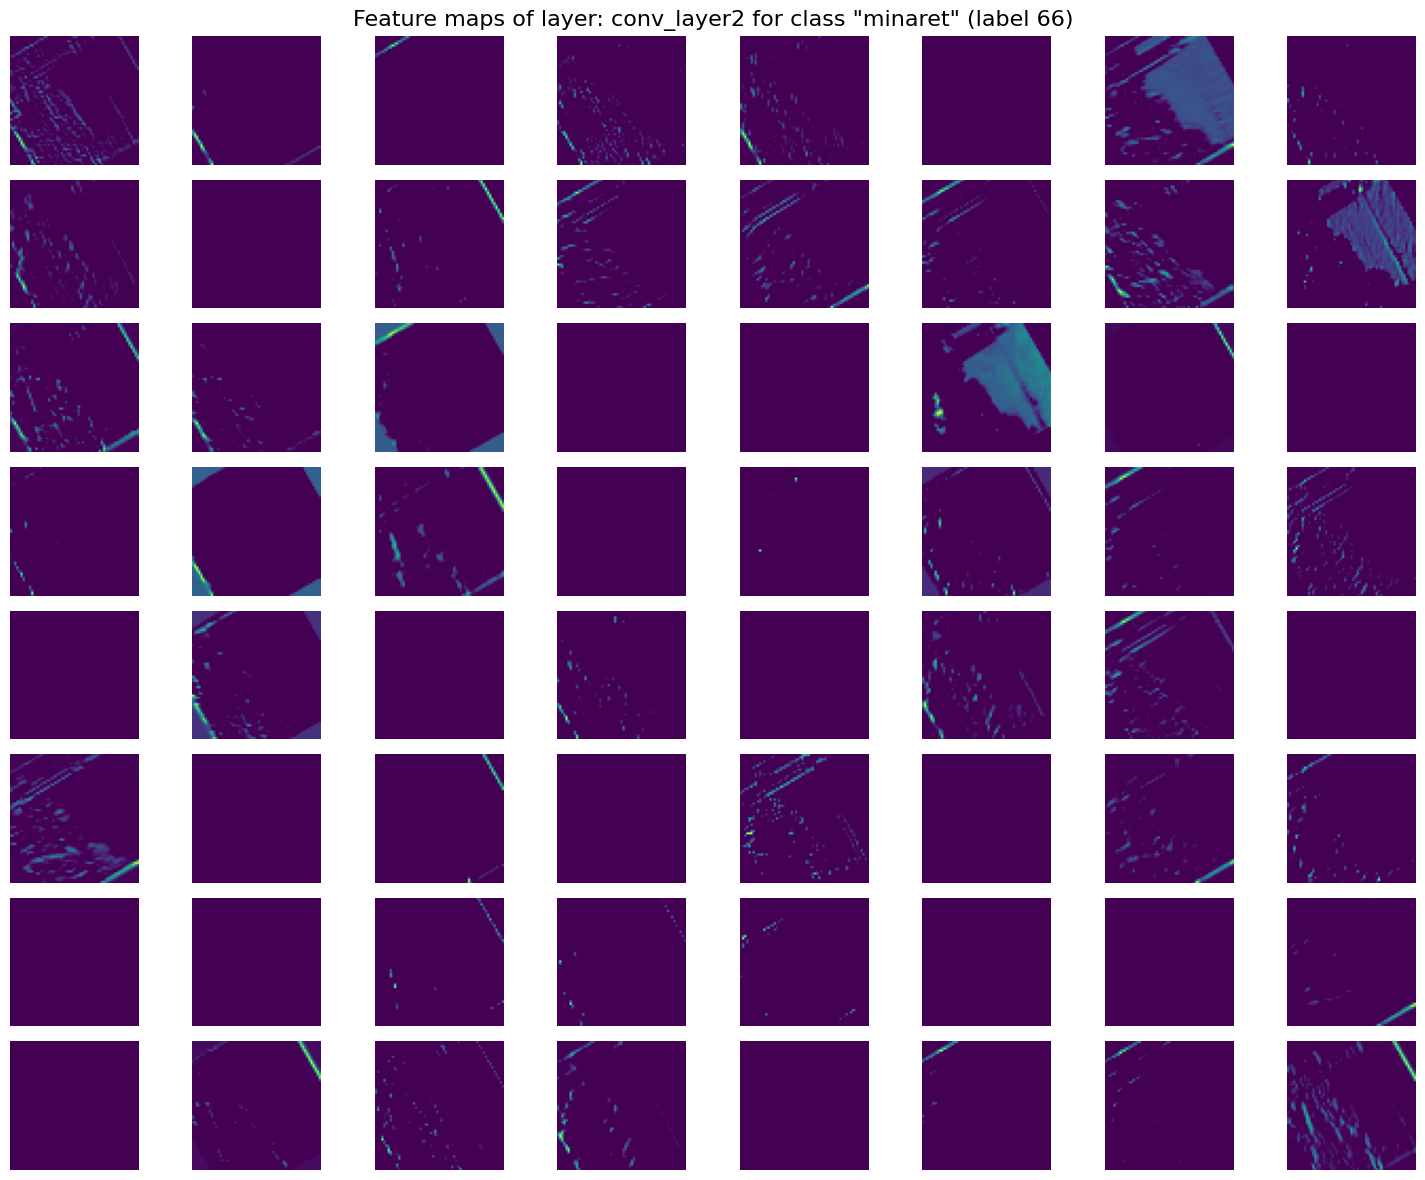

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


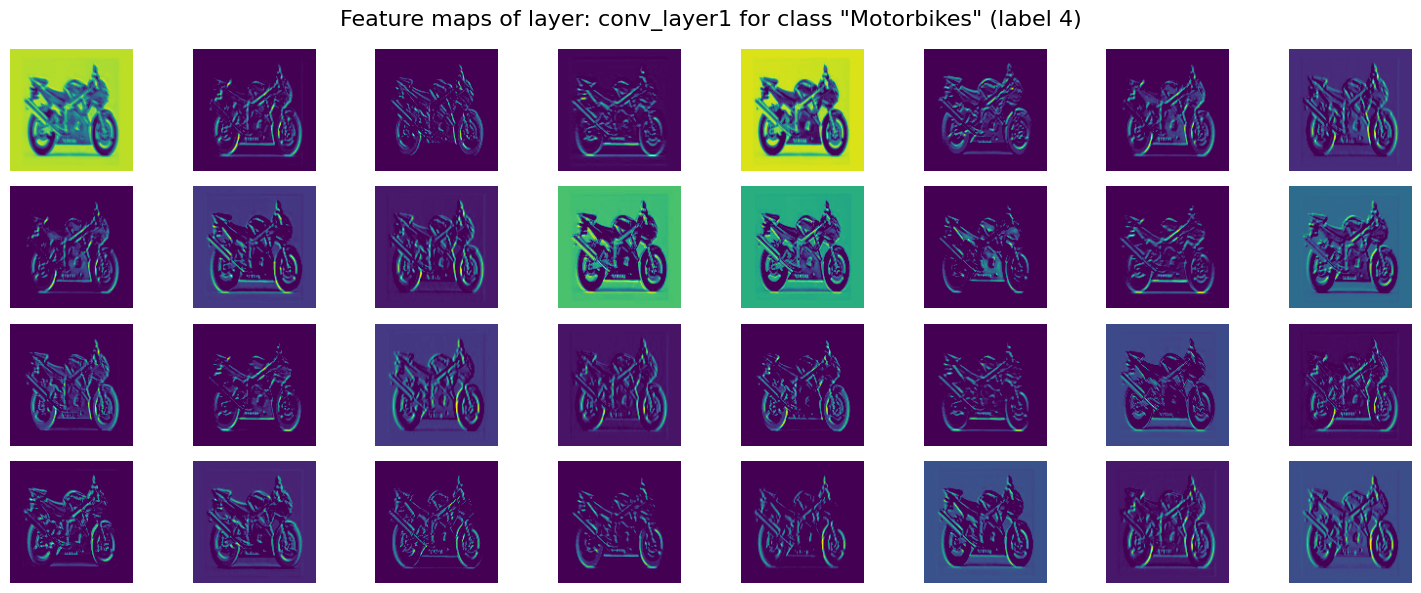

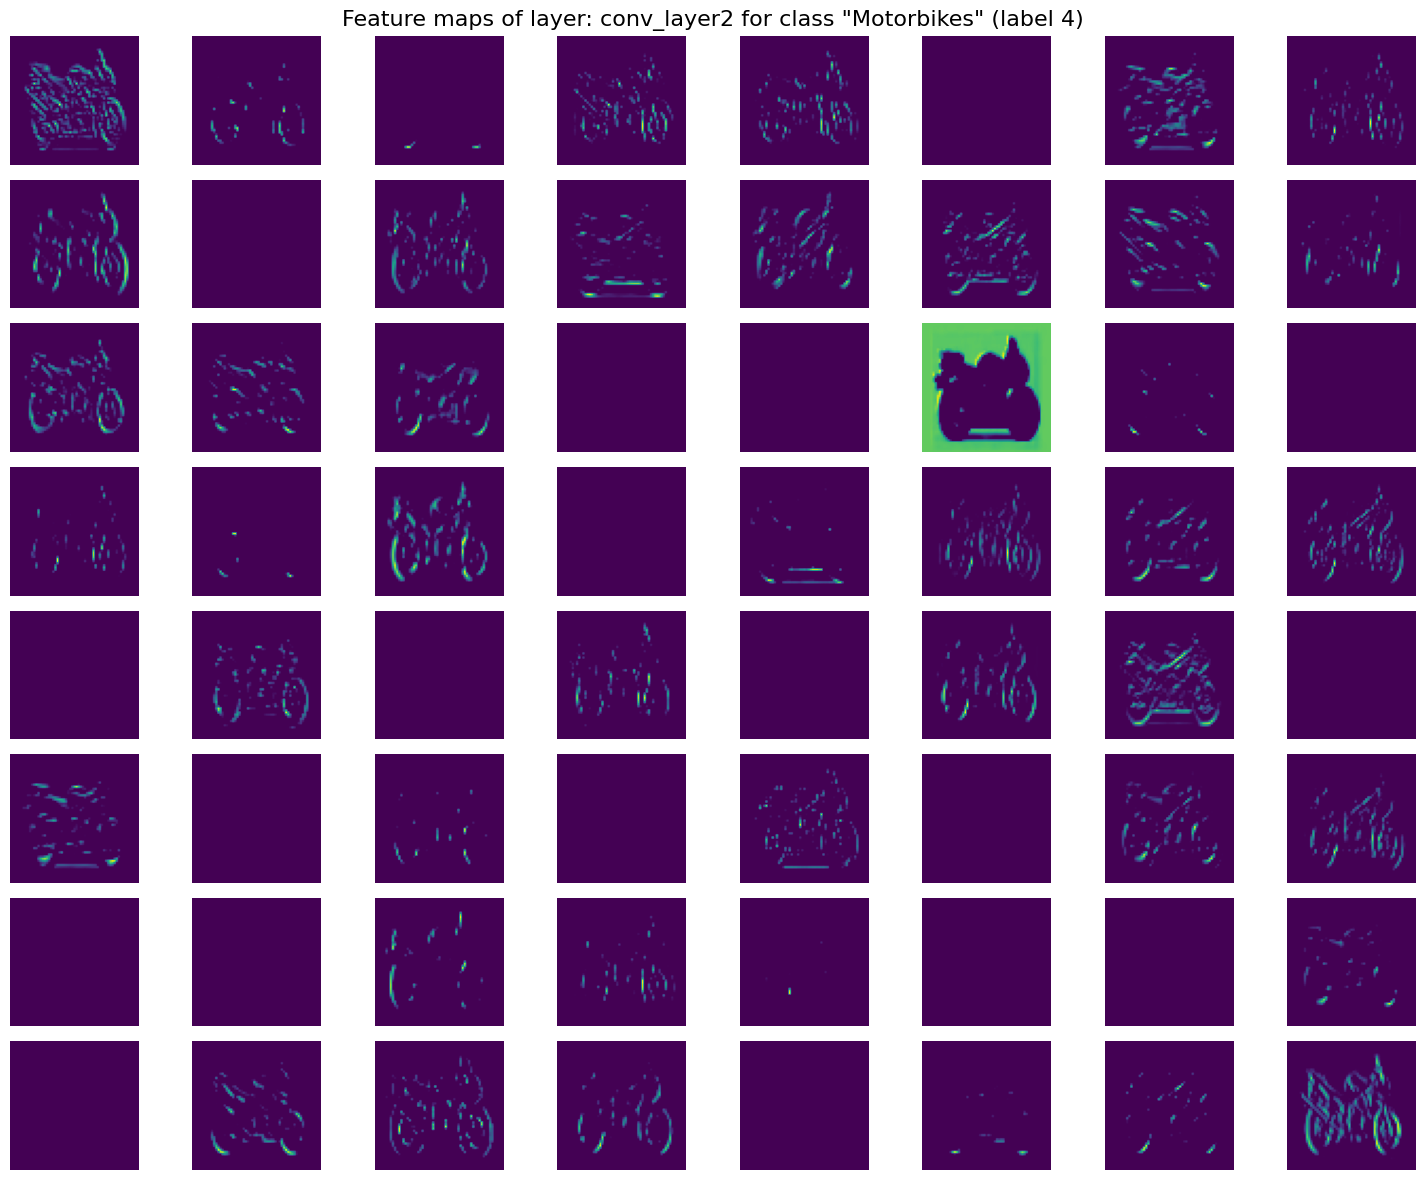

In [75]:
for img, label, class_name in images_and_labels:
    visualize_feature_maps_custom(img, label, class_name)
